In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
training=pd.read_csv('E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH/thigh_training.csv')
testing=pd.read_csv('E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH/thigh_testing.csv')
total_data=pd.concat([training,testing],axis=0)
deviation=total_data.groupby(['Activity','Subject','Sample_Num']).std()
deviation.drop(deviation.columns[[0]],axis=1,inplace=True)
deviation.reset_index(inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
def stdplot(data_input,act):
    for sub in range(1,7):
      plt.clf()
      data=data_input[(data_input['Activity']==act)&(data_input['Subject']==sub)]
      title=act+", Subject- "+str(sub)+", Accelerometer Reading"
      plt.figure(figsize=(20,10))
      plt.scatter(data.Sample_Num,data.attr_x_acc,s=3,c='r')
      plt.scatter(data.Sample_Num,data.attr_y_acc,s=3,c='g')
      plt.scatter(data.Sample_Num,data.attr_z_acc,s=3,c='b')
      plt.xlabel('Sample Number')
      plt.ylabel('Acceleration')
      plt.title(title)
      plt.show();

<Figure size 432x288 with 0 Axes>

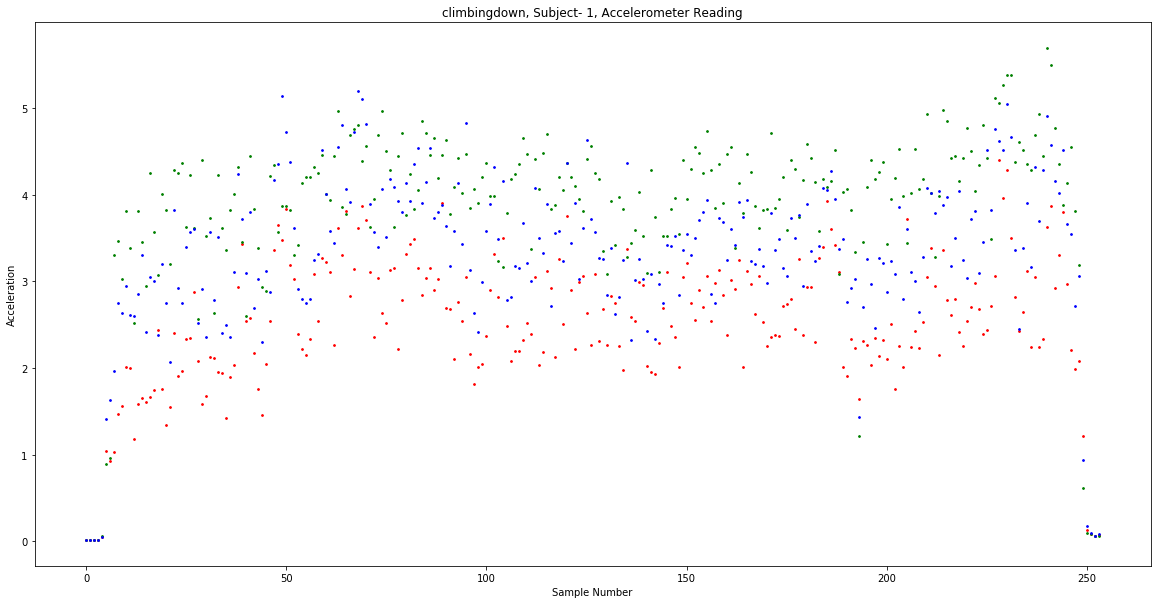

<Figure size 432x288 with 0 Axes>

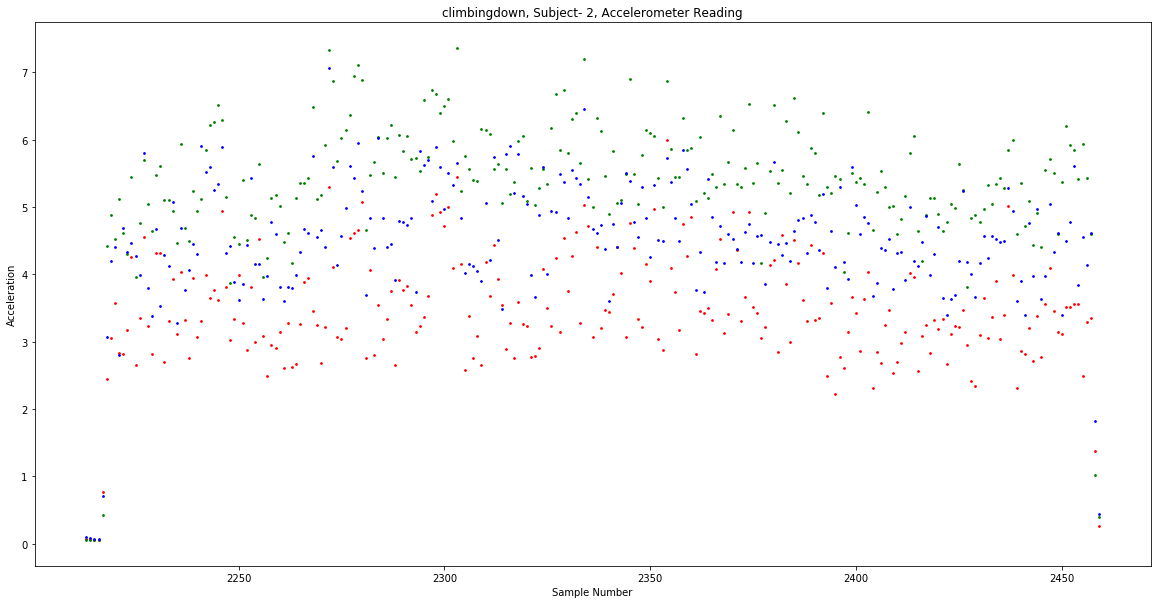

<Figure size 432x288 with 0 Axes>

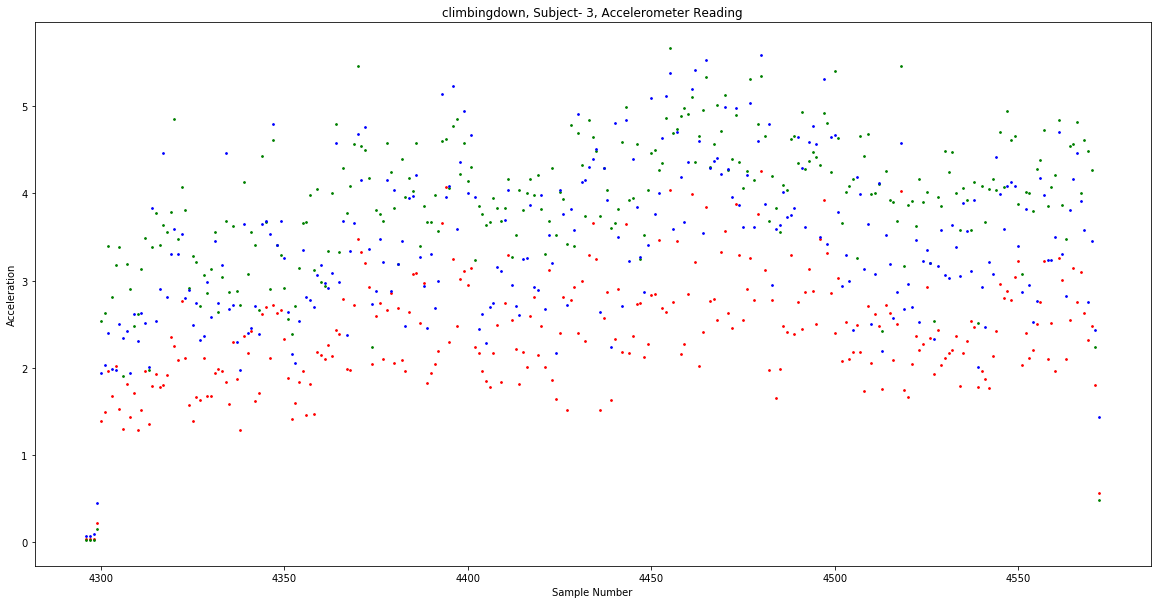

<Figure size 432x288 with 0 Axes>

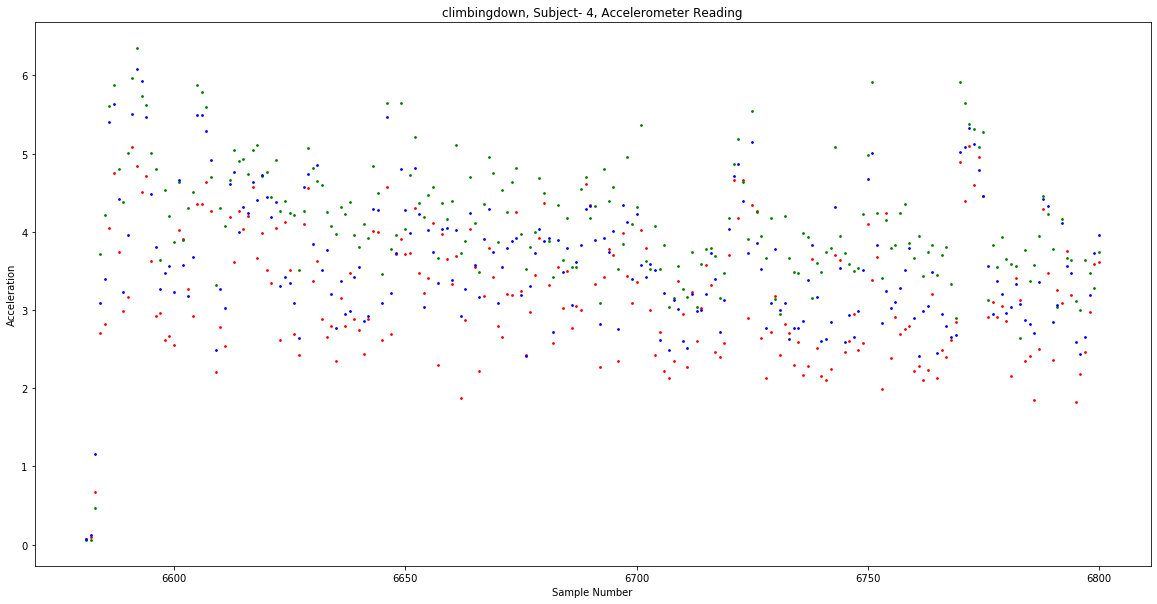

<Figure size 432x288 with 0 Axes>

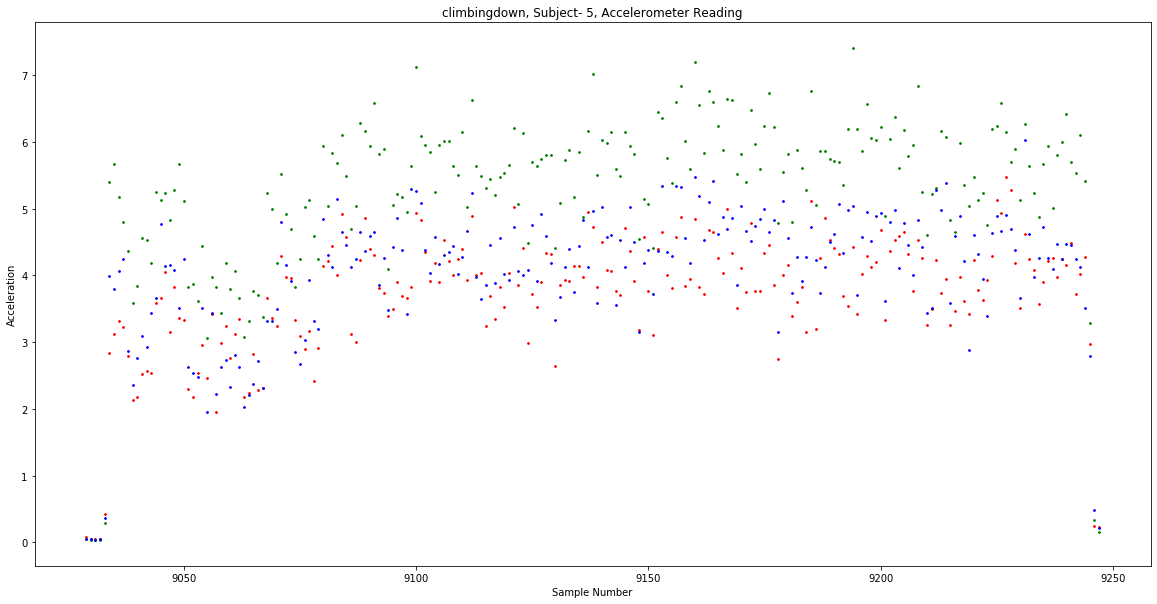

<Figure size 432x288 with 0 Axes>

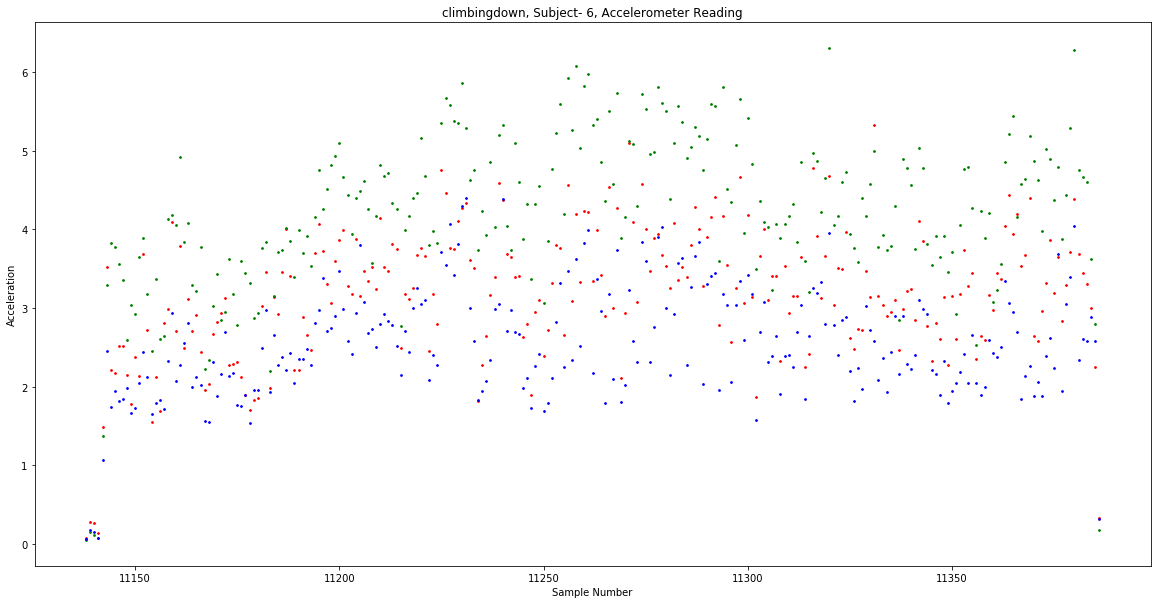

<Figure size 432x288 with 0 Axes>

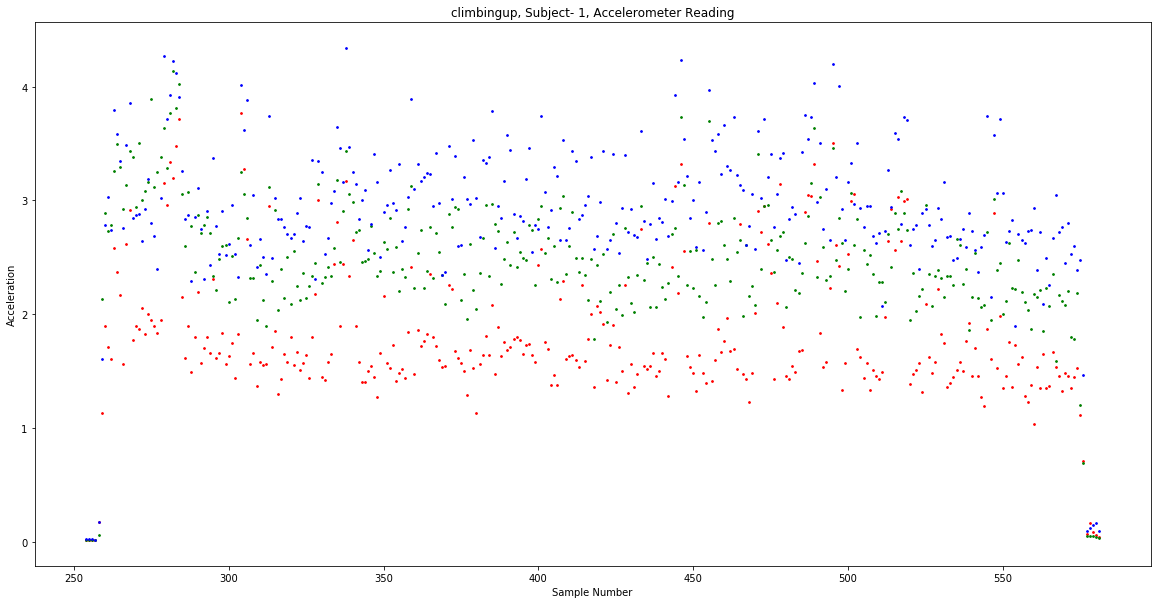

<Figure size 432x288 with 0 Axes>

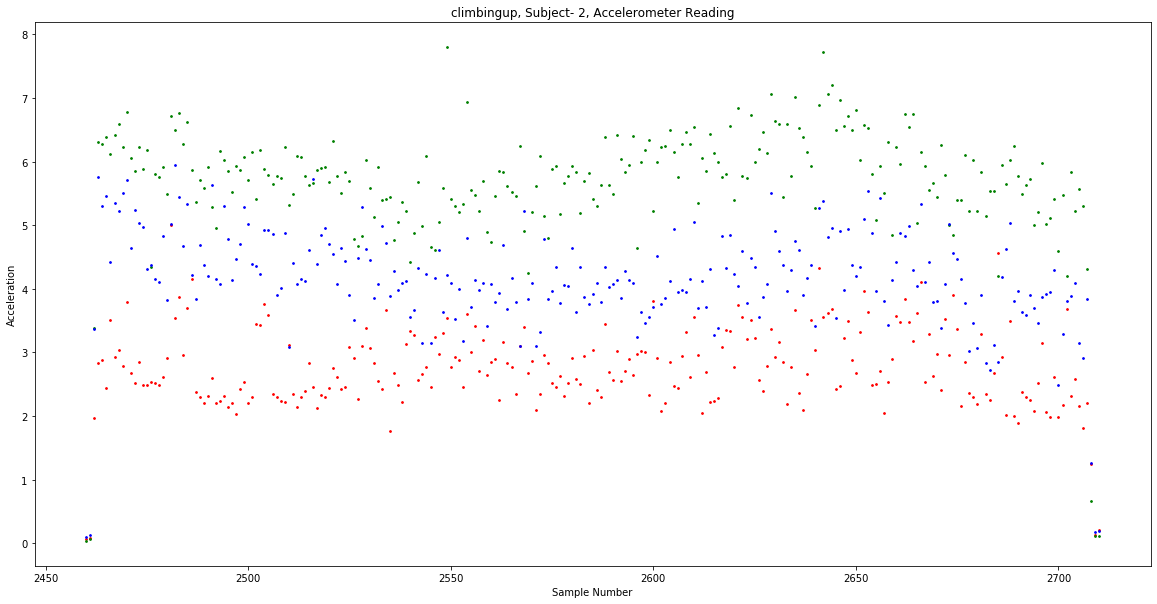

<Figure size 432x288 with 0 Axes>

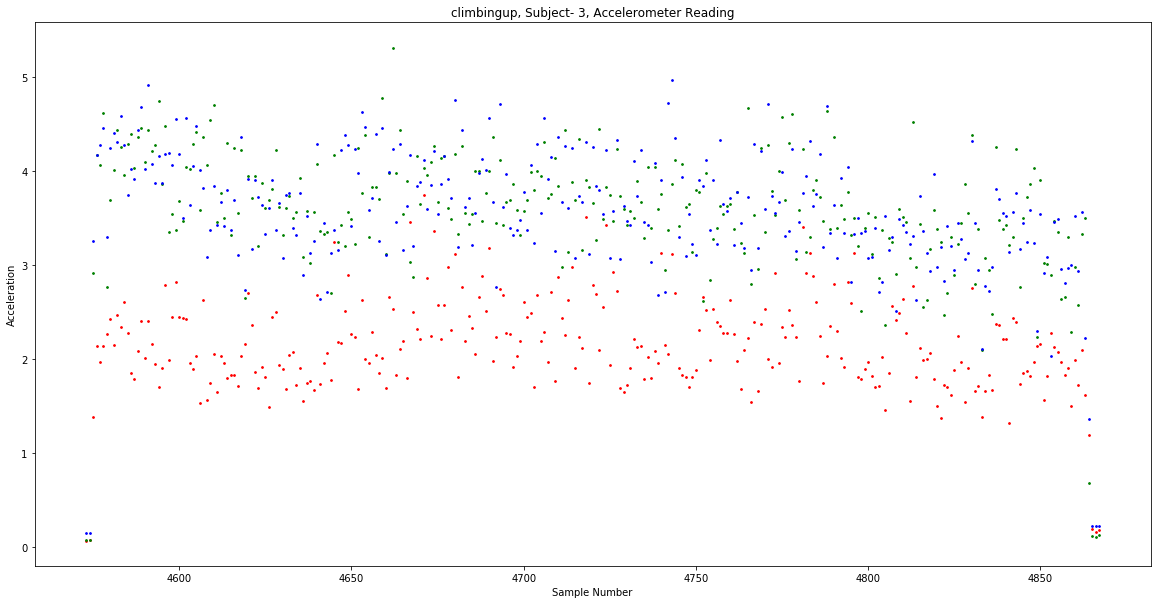

<Figure size 432x288 with 0 Axes>

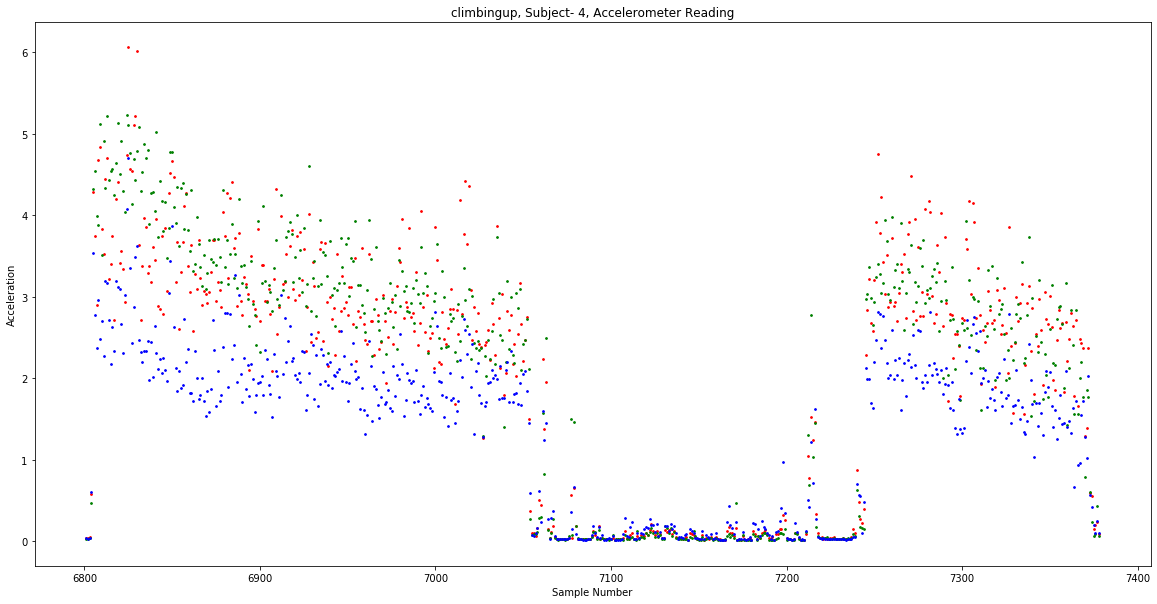

<Figure size 432x288 with 0 Axes>

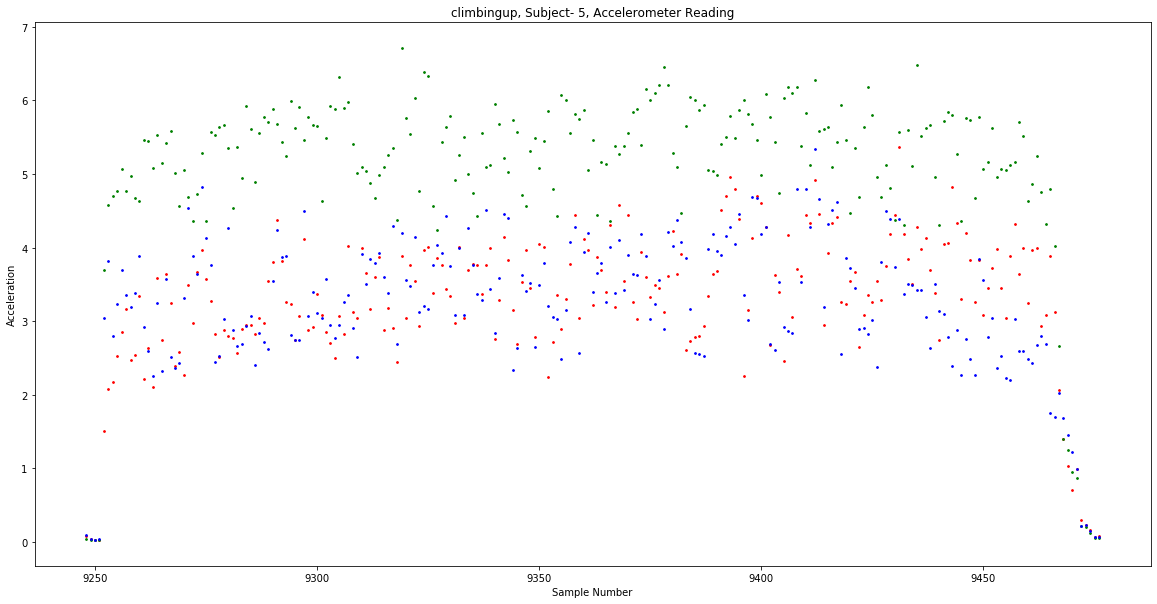

<Figure size 432x288 with 0 Axes>

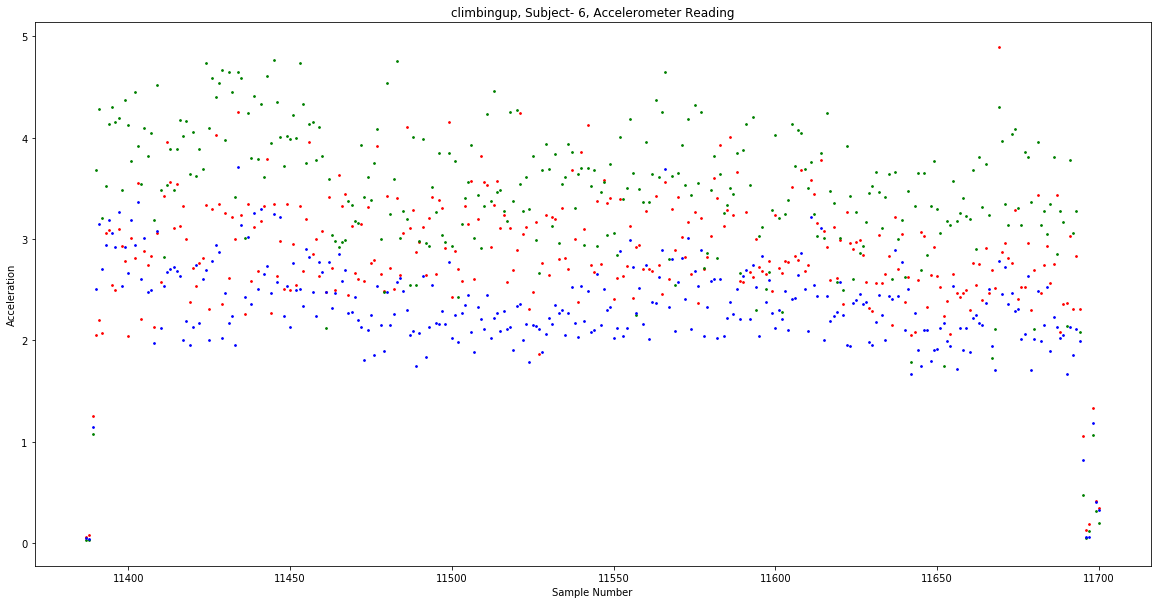

<Figure size 432x288 with 0 Axes>

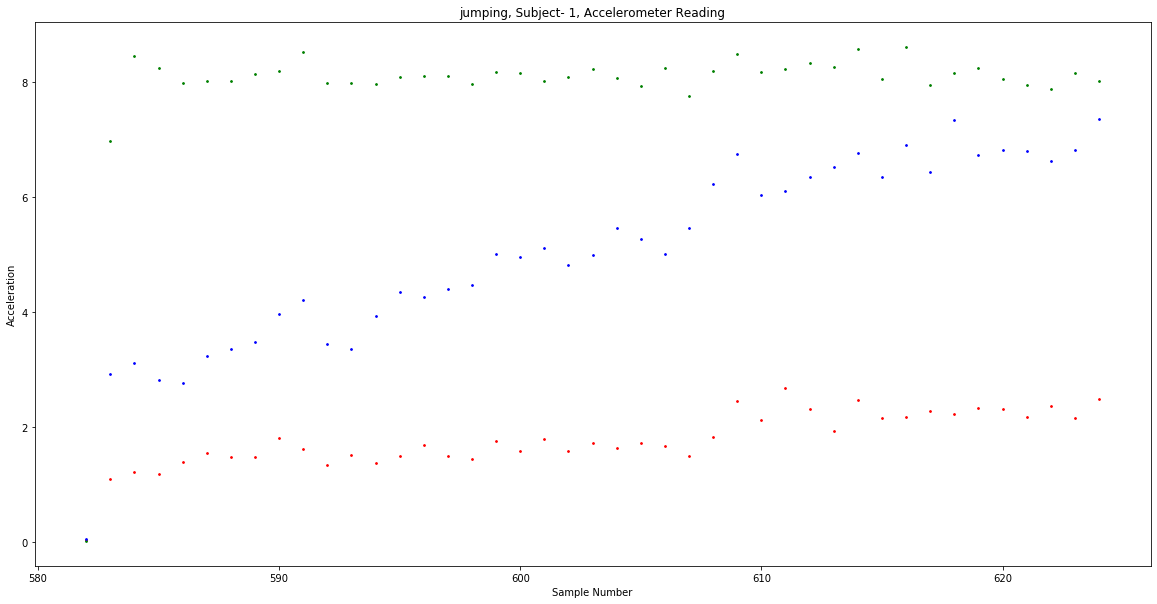

<Figure size 432x288 with 0 Axes>

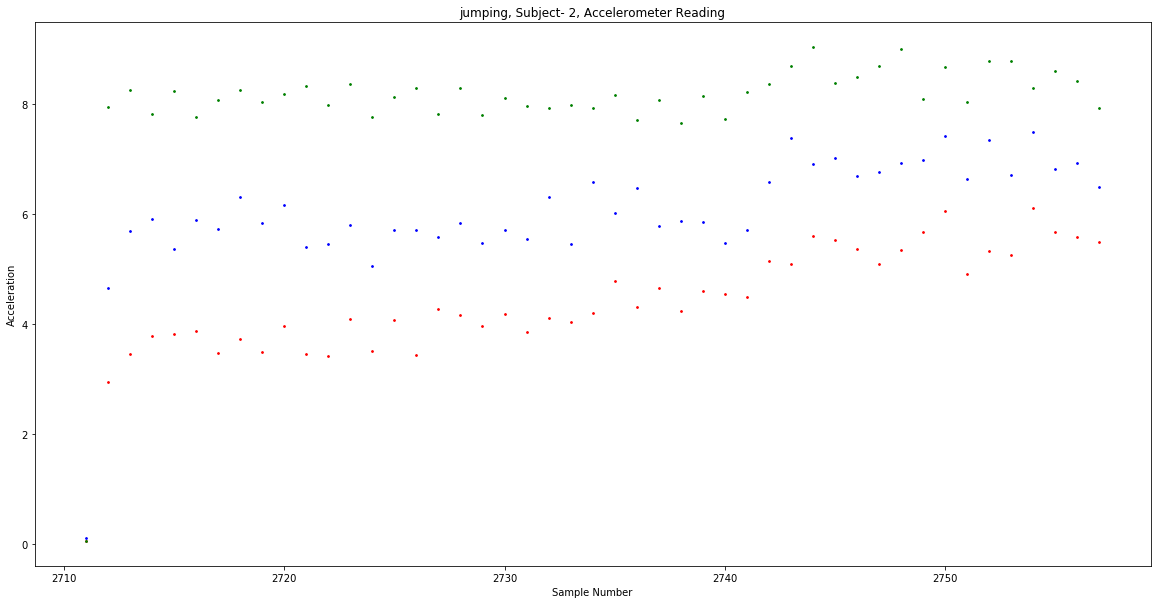

<Figure size 432x288 with 0 Axes>

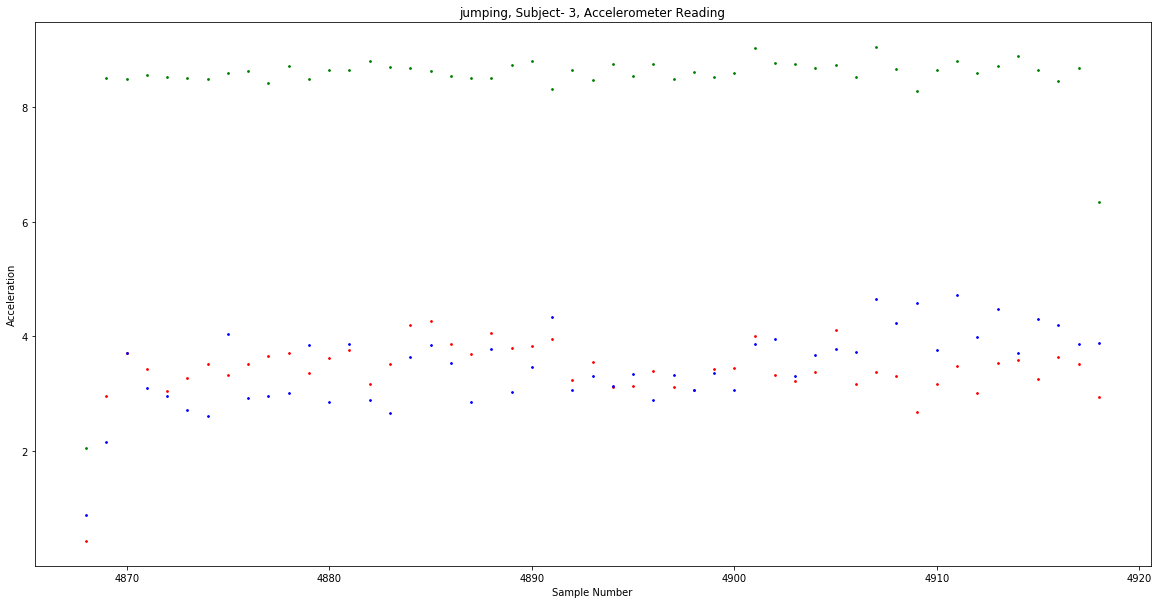

<Figure size 432x288 with 0 Axes>

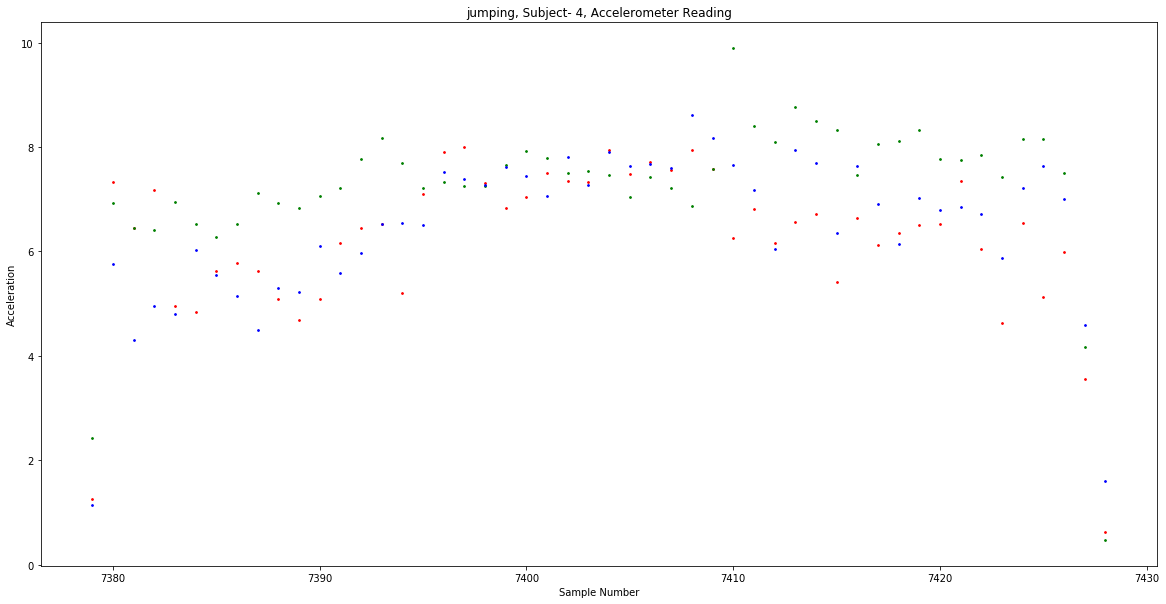

<Figure size 432x288 with 0 Axes>

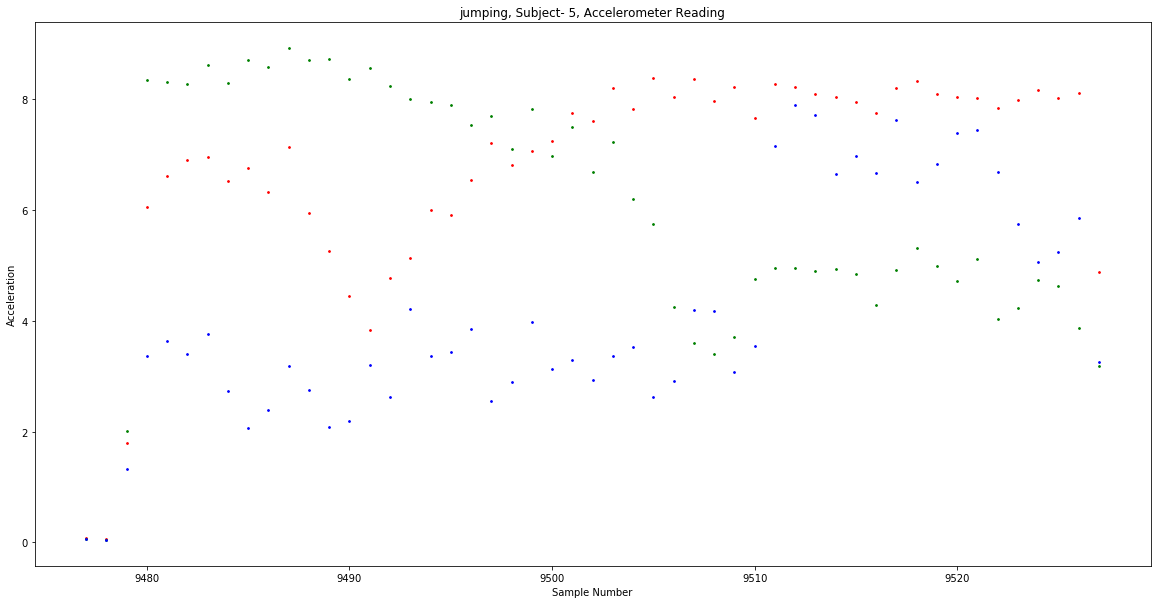

<Figure size 432x288 with 0 Axes>

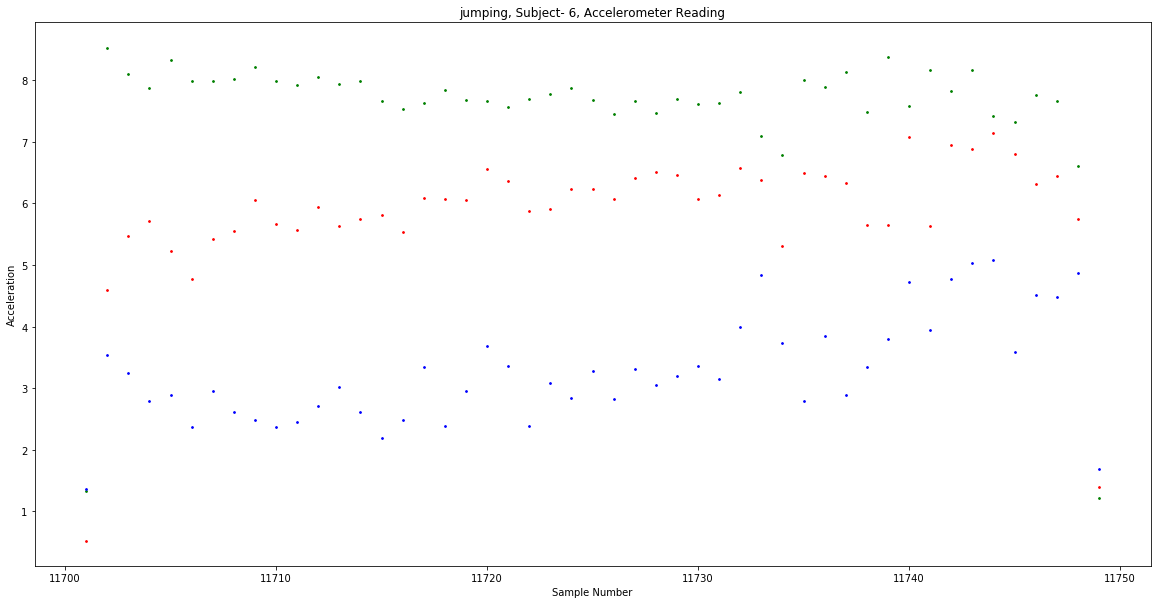

<Figure size 432x288 with 0 Axes>

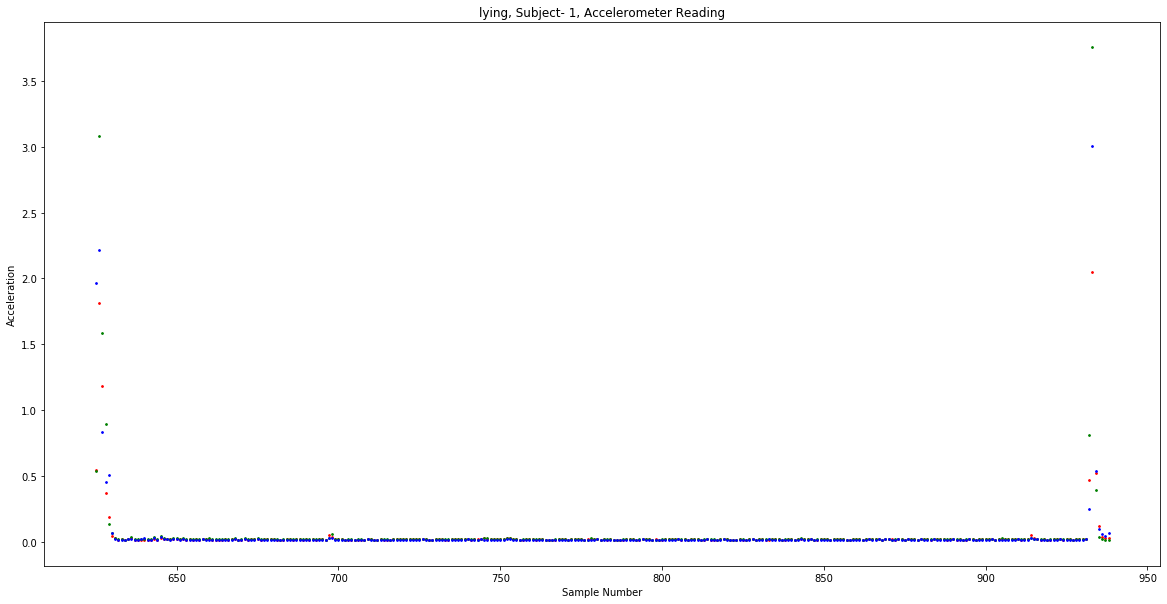

<Figure size 432x288 with 0 Axes>

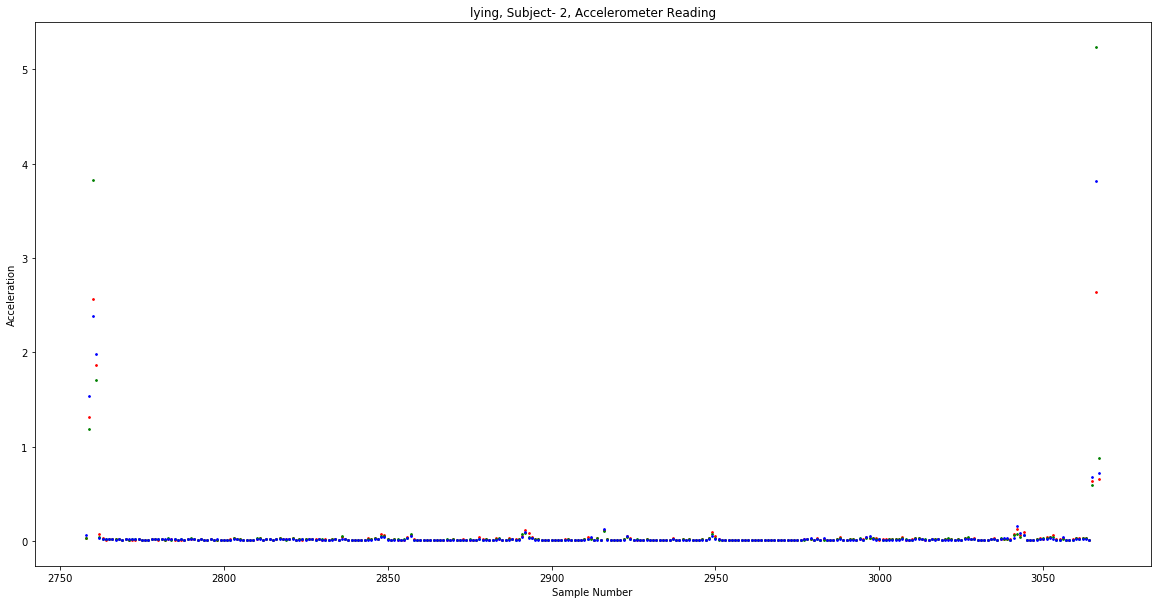

<Figure size 432x288 with 0 Axes>

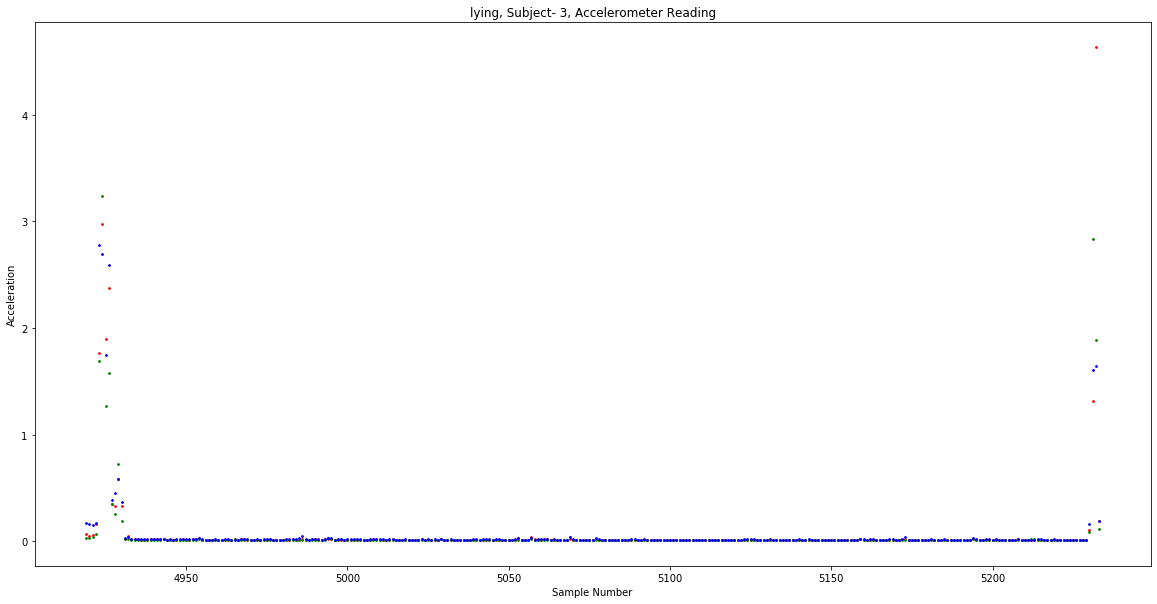

<Figure size 432x288 with 0 Axes>

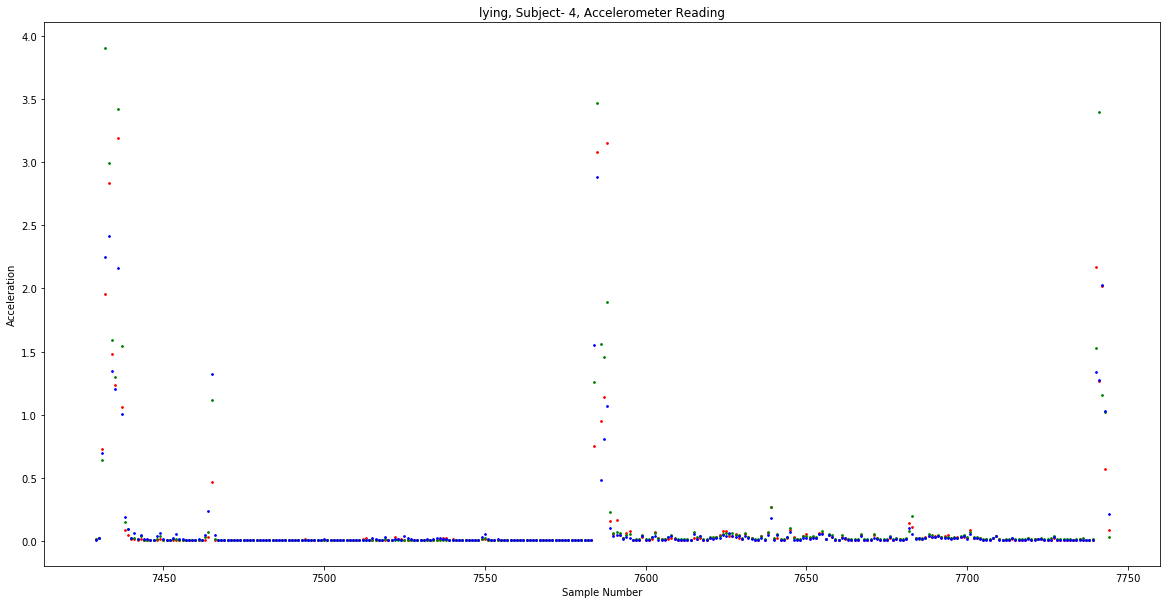

<Figure size 432x288 with 0 Axes>

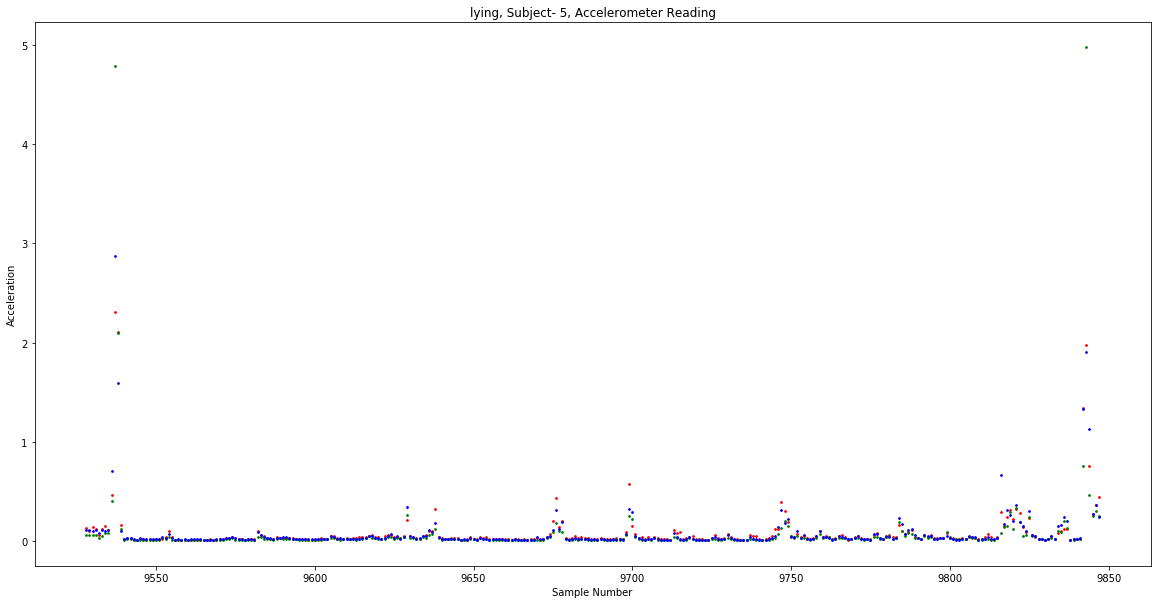

<Figure size 432x288 with 0 Axes>

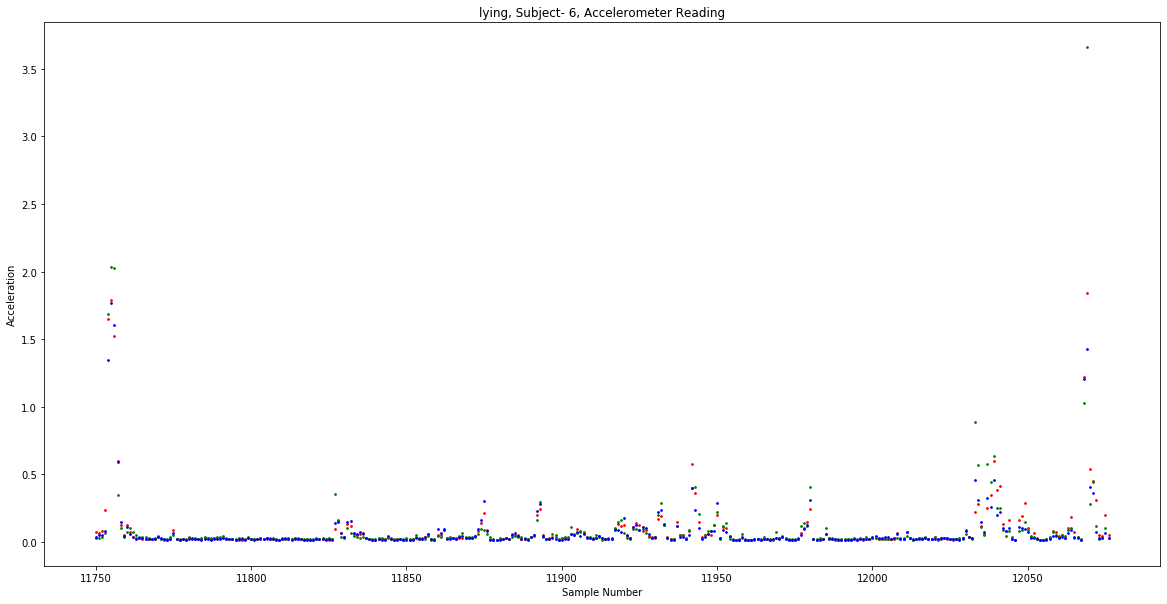

<Figure size 432x288 with 0 Axes>

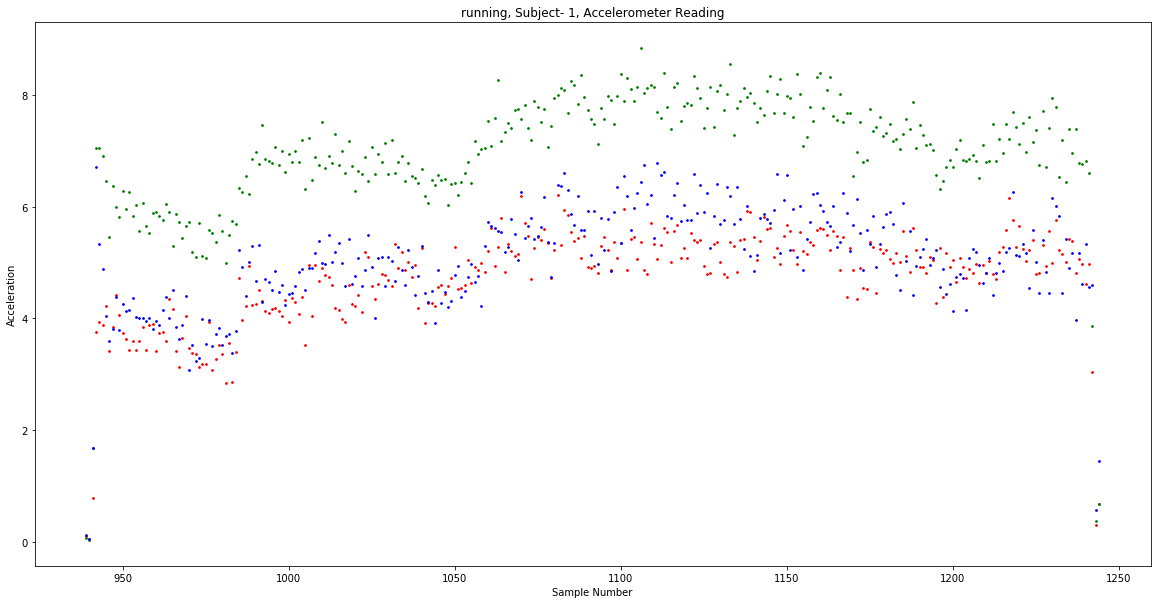

<Figure size 432x288 with 0 Axes>

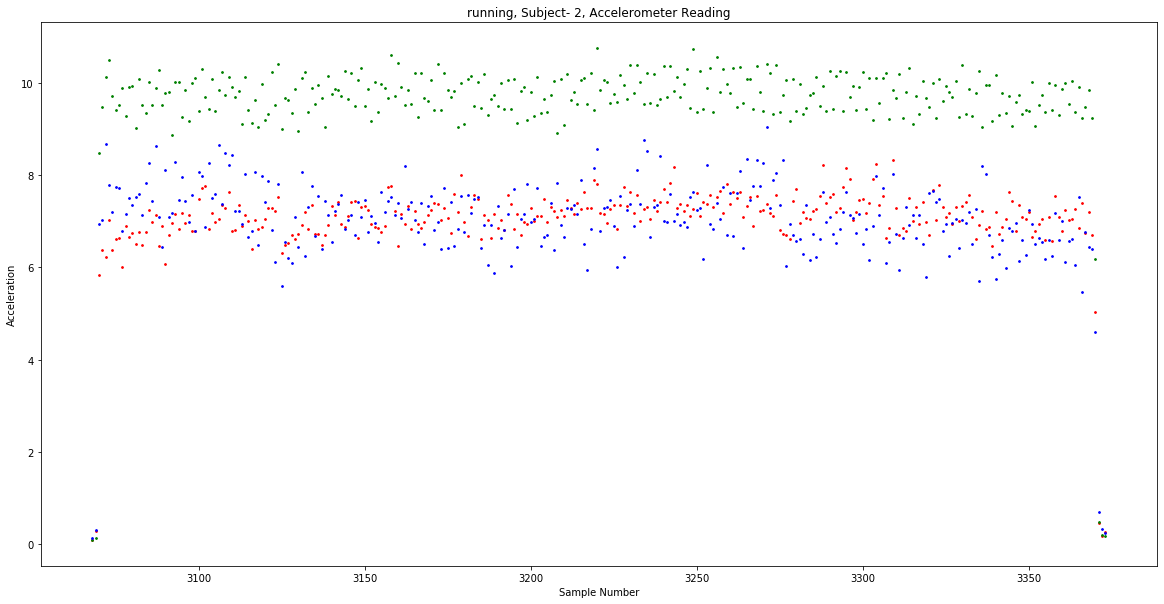

<Figure size 432x288 with 0 Axes>

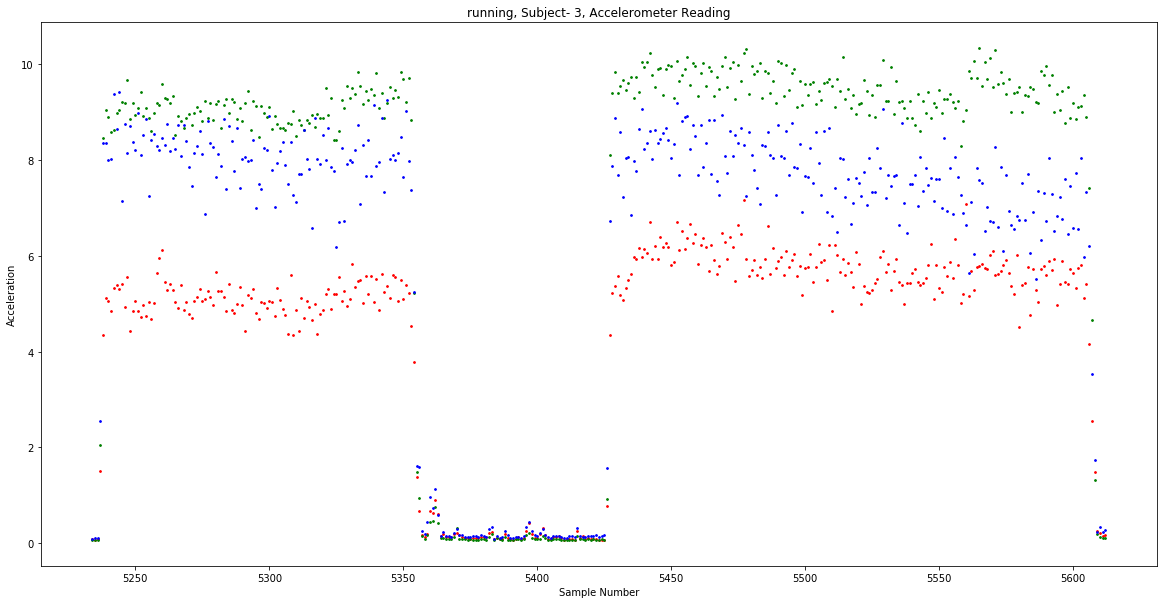

<Figure size 432x288 with 0 Axes>

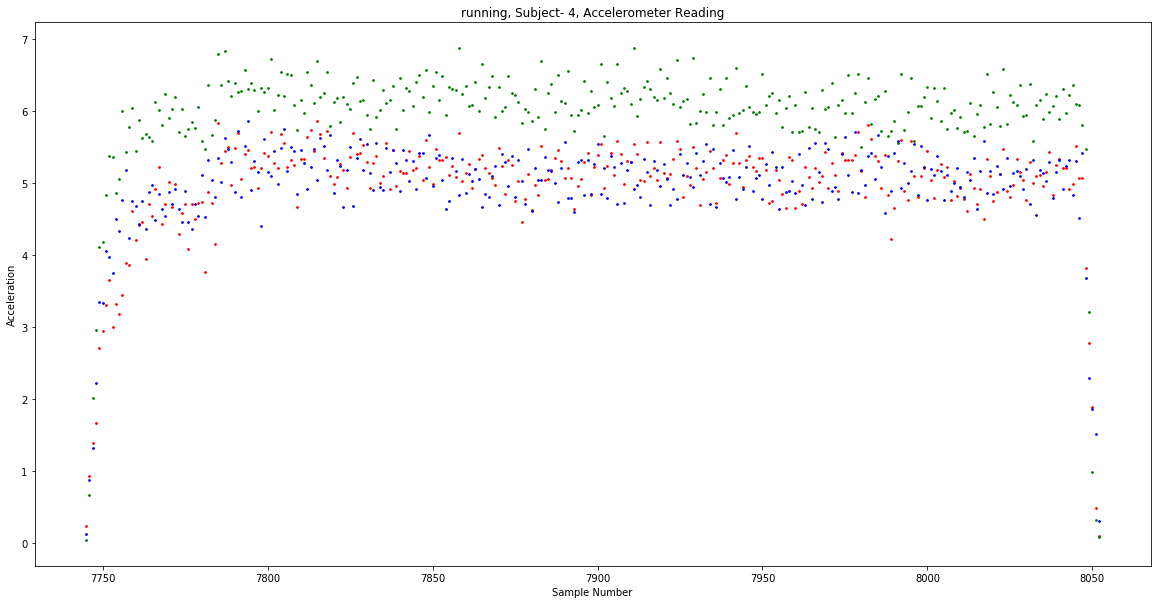

<Figure size 432x288 with 0 Axes>

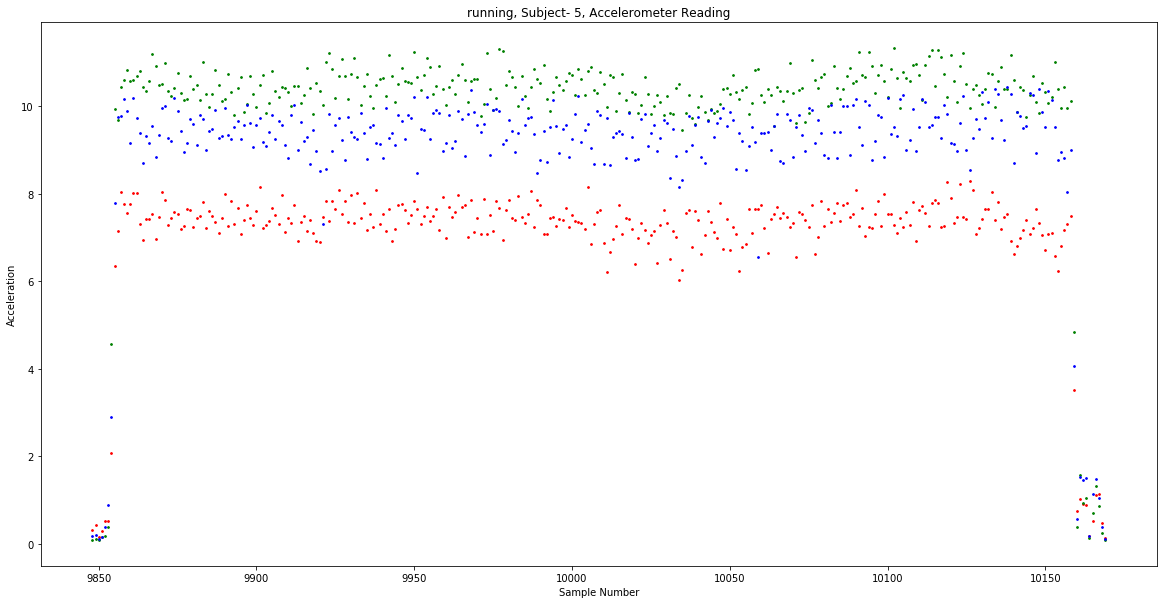

<Figure size 432x288 with 0 Axes>

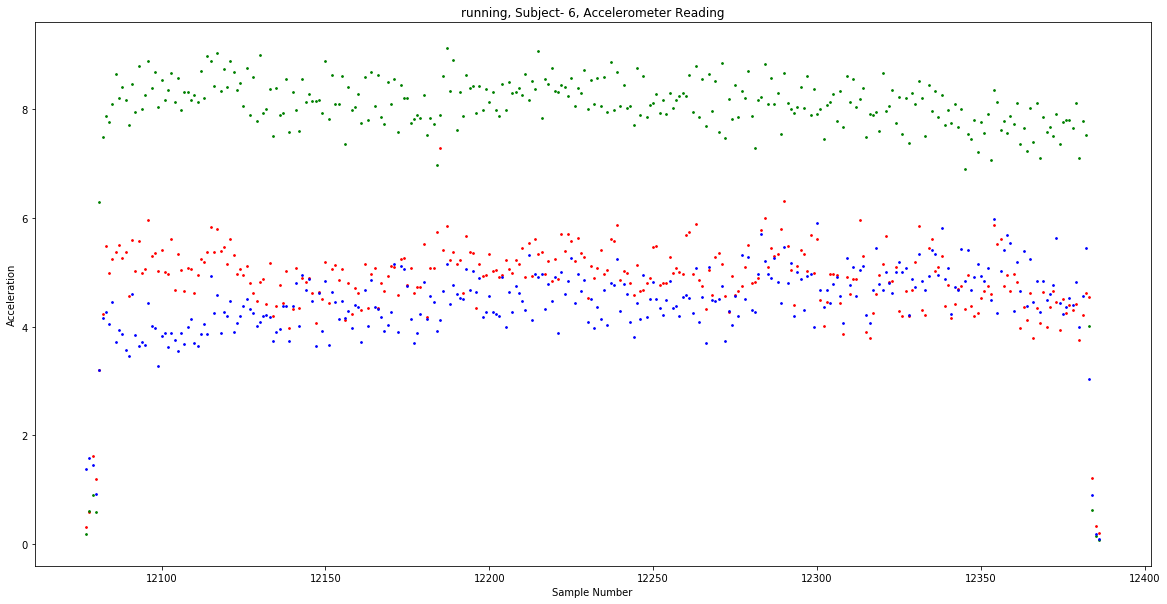

<Figure size 432x288 with 0 Axes>

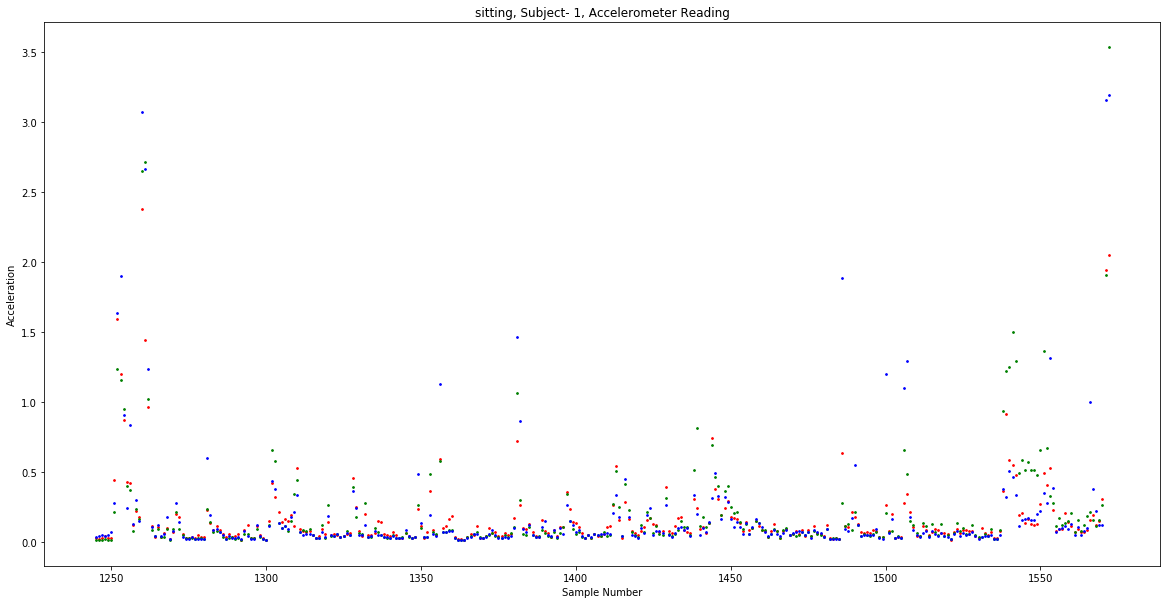

<Figure size 432x288 with 0 Axes>

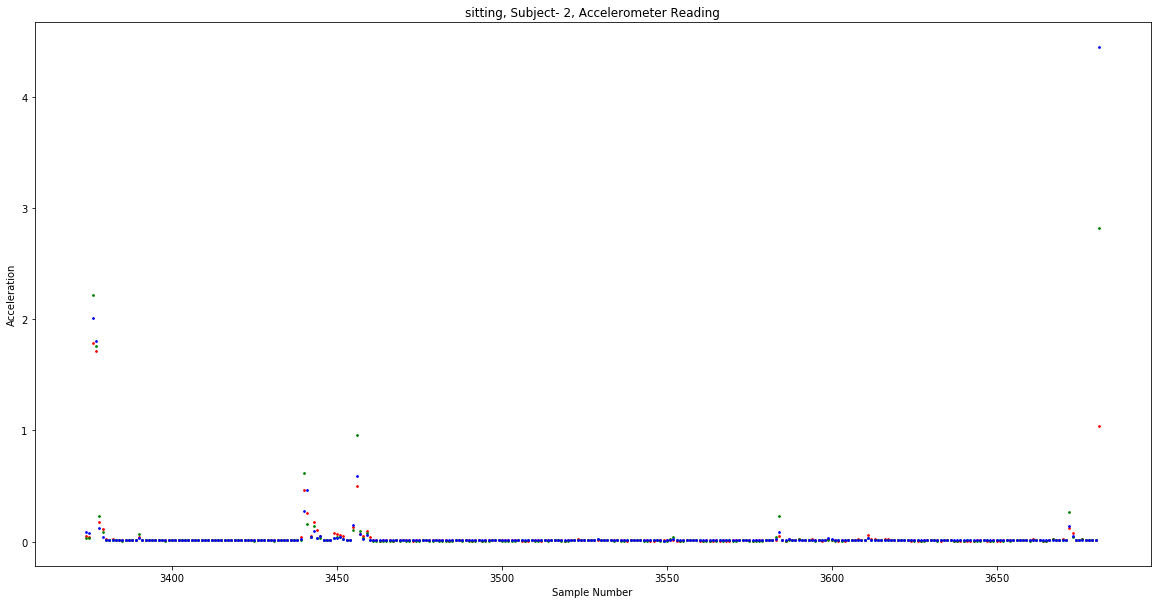

<Figure size 432x288 with 0 Axes>

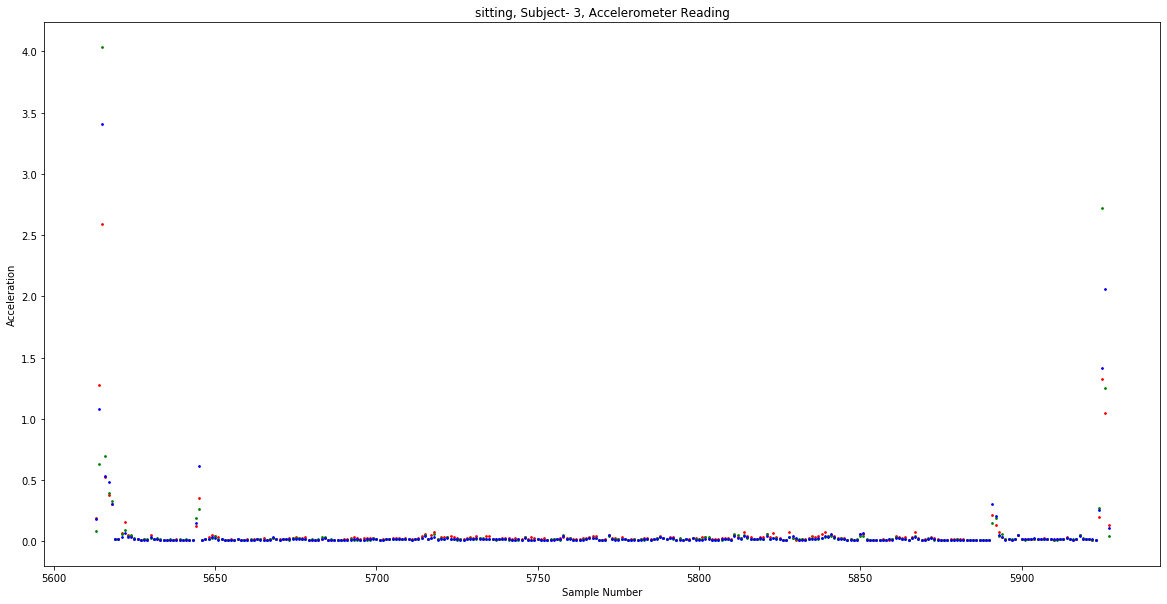

<Figure size 432x288 with 0 Axes>

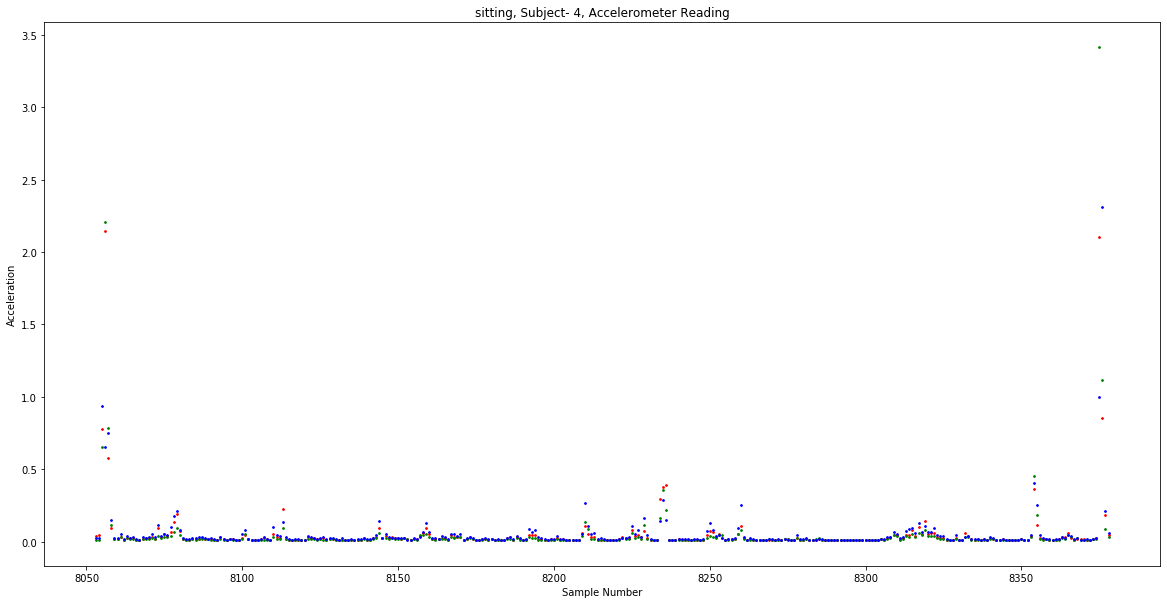

<Figure size 432x288 with 0 Axes>

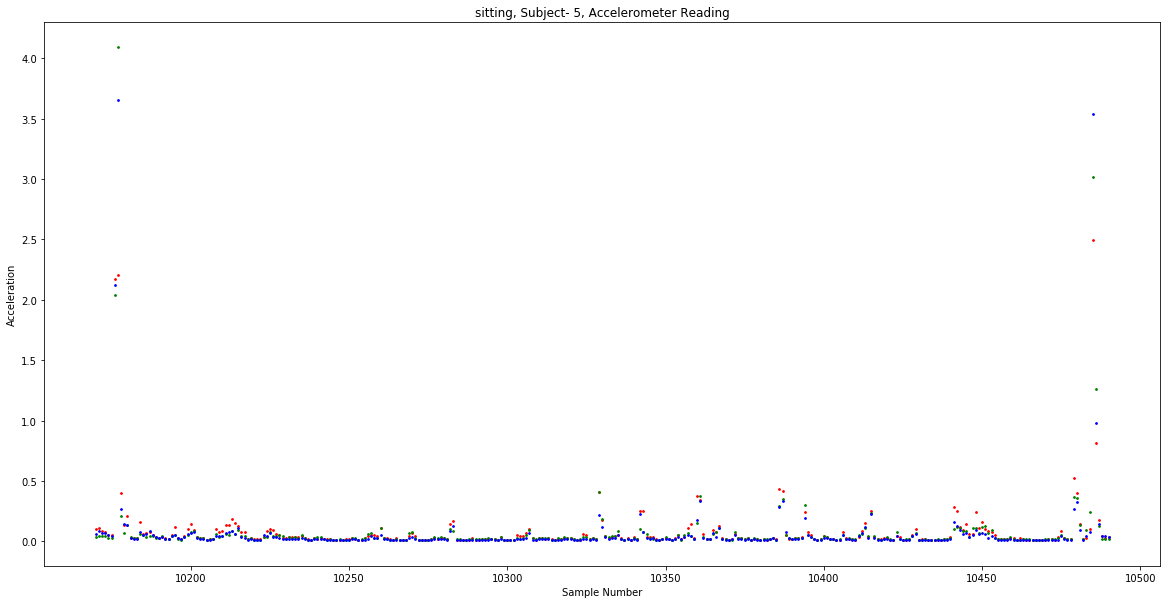

<Figure size 432x288 with 0 Axes>

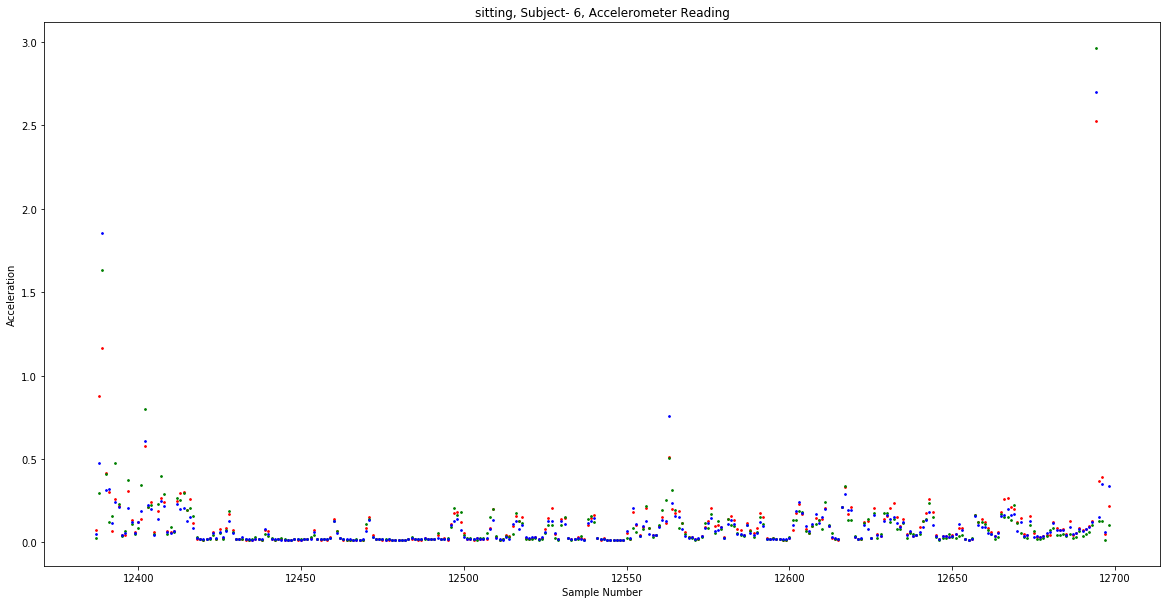

<Figure size 432x288 with 0 Axes>

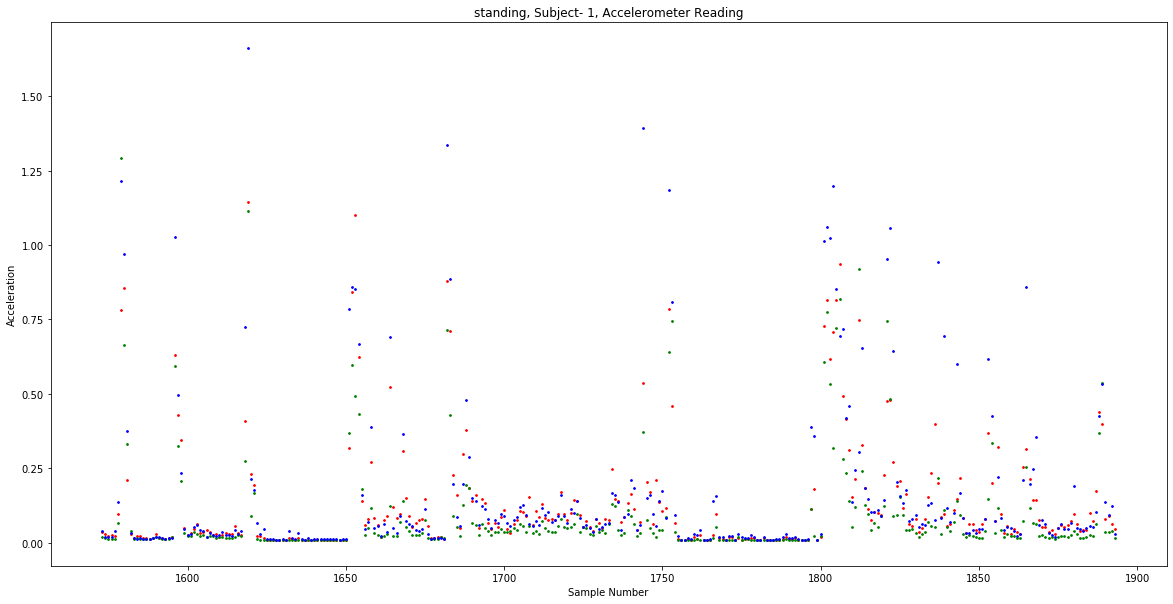

<Figure size 432x288 with 0 Axes>

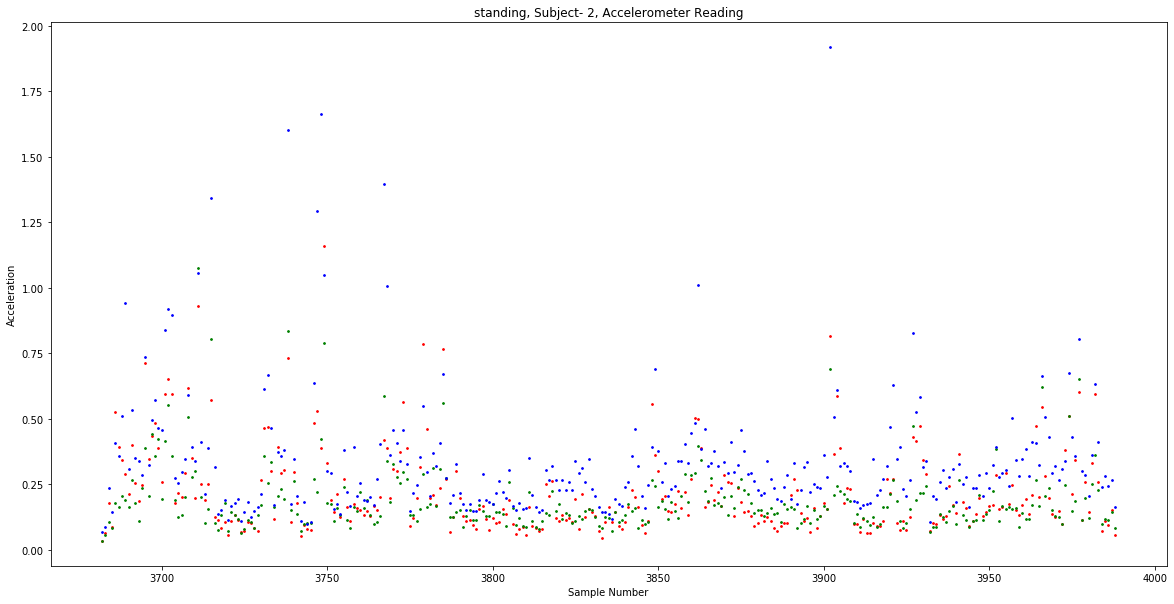

<Figure size 432x288 with 0 Axes>

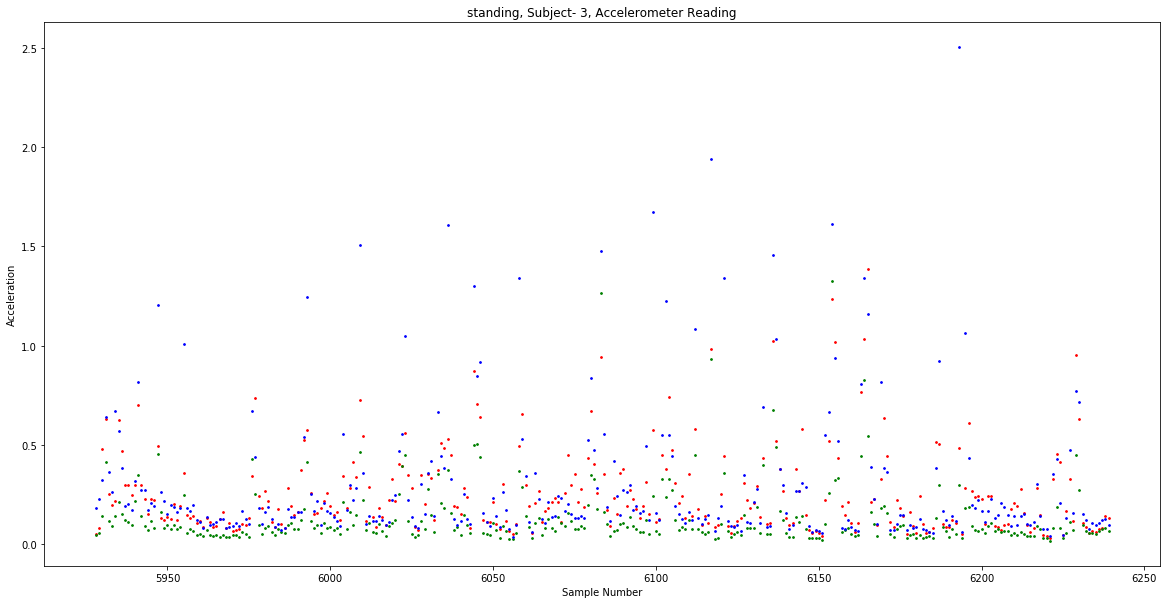

<Figure size 432x288 with 0 Axes>

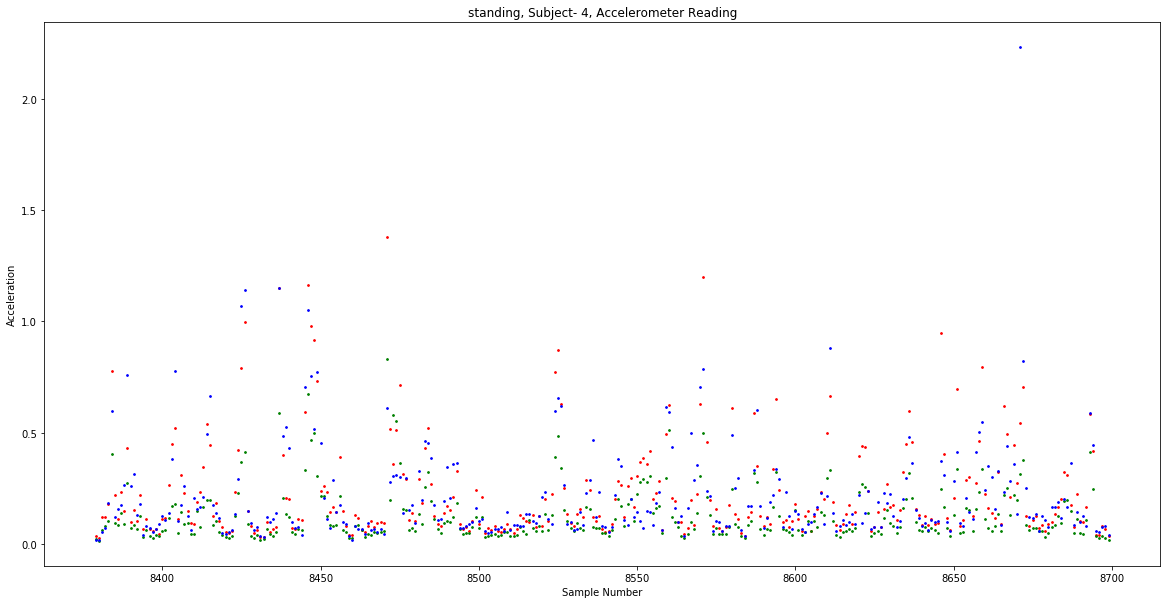

<Figure size 432x288 with 0 Axes>

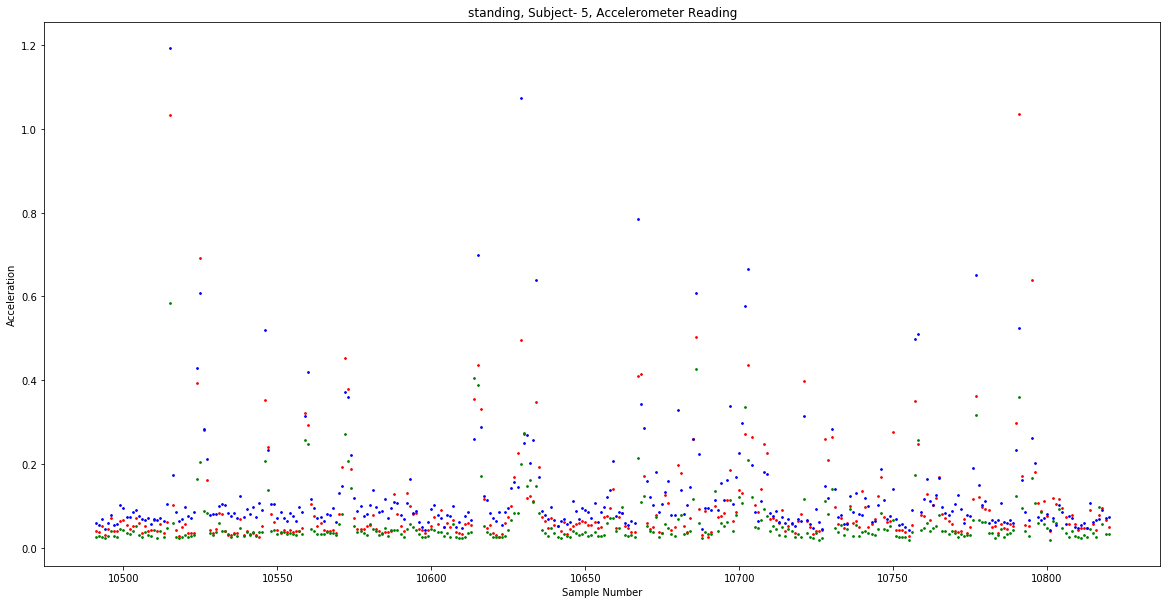

<Figure size 432x288 with 0 Axes>

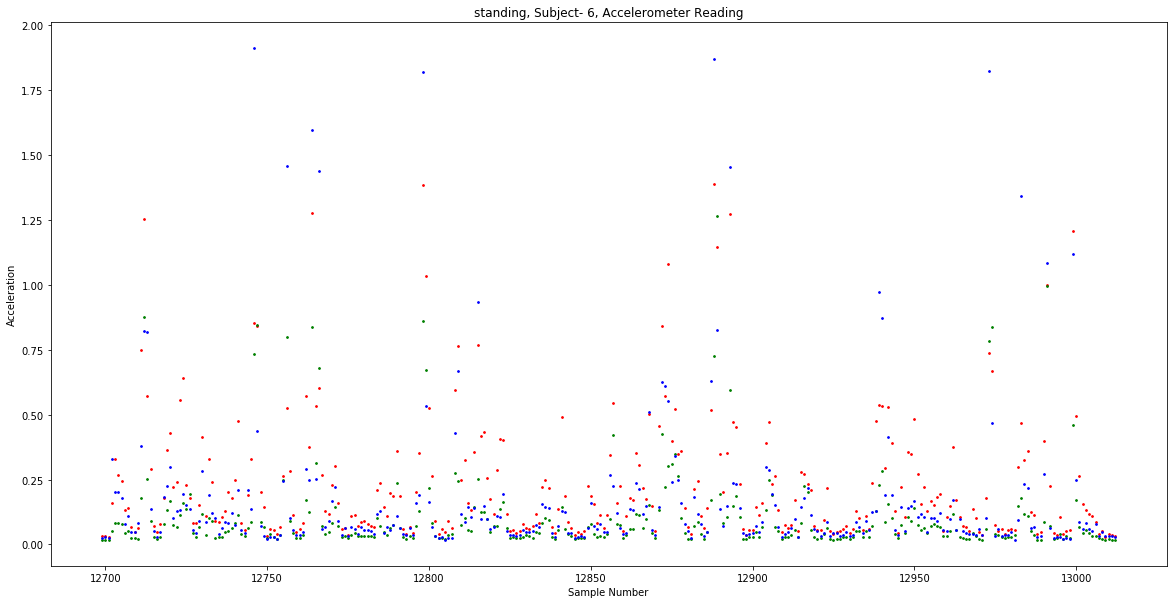

<Figure size 432x288 with 0 Axes>

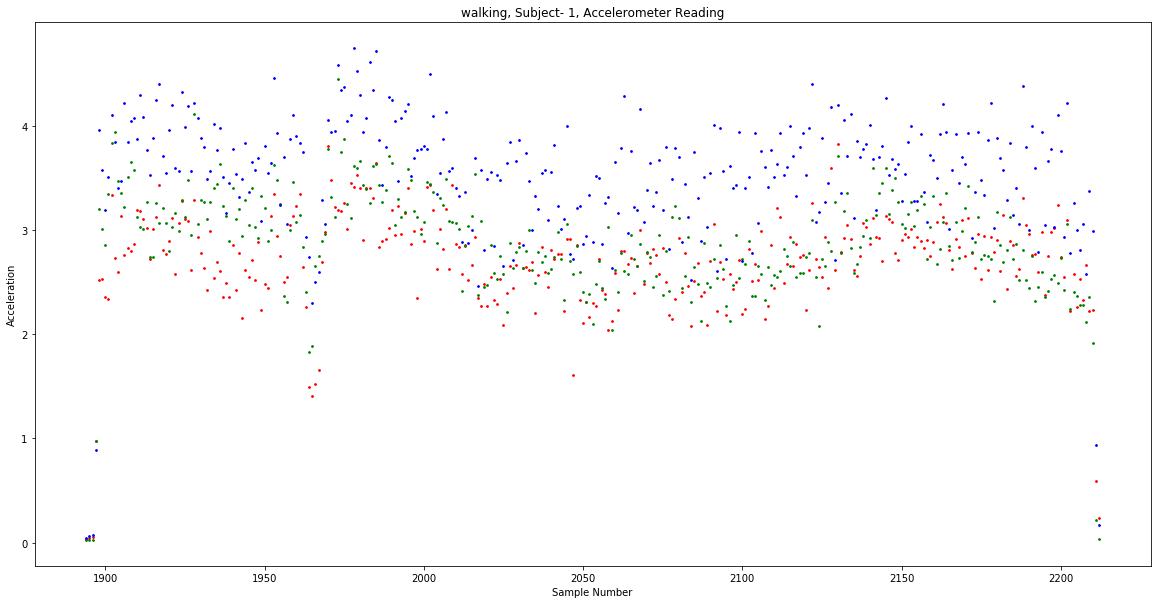

<Figure size 432x288 with 0 Axes>

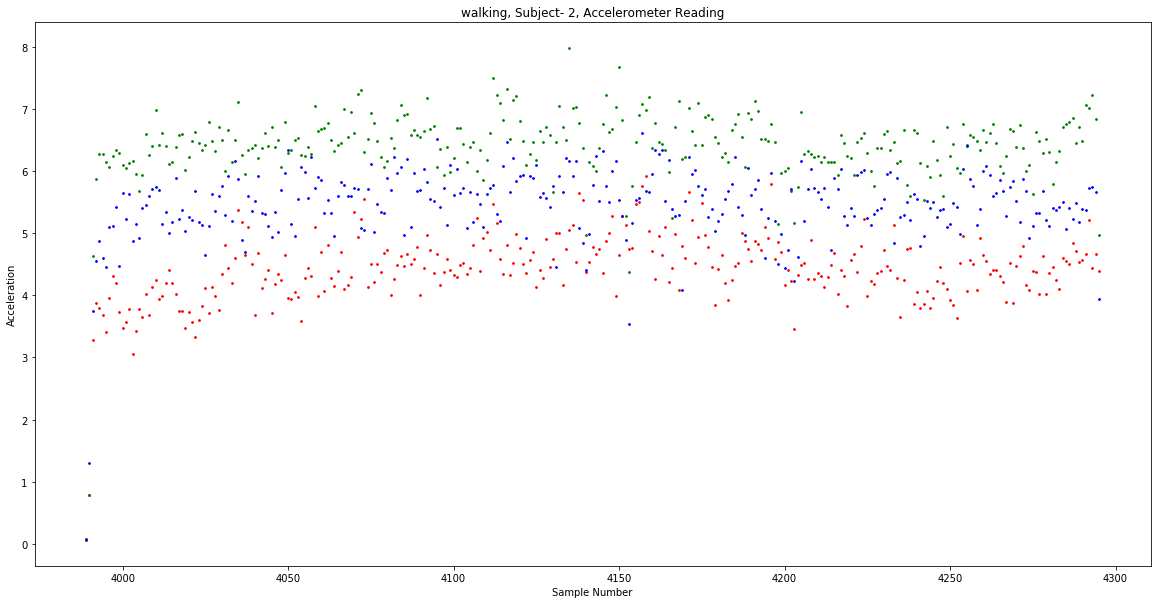

<Figure size 432x288 with 0 Axes>

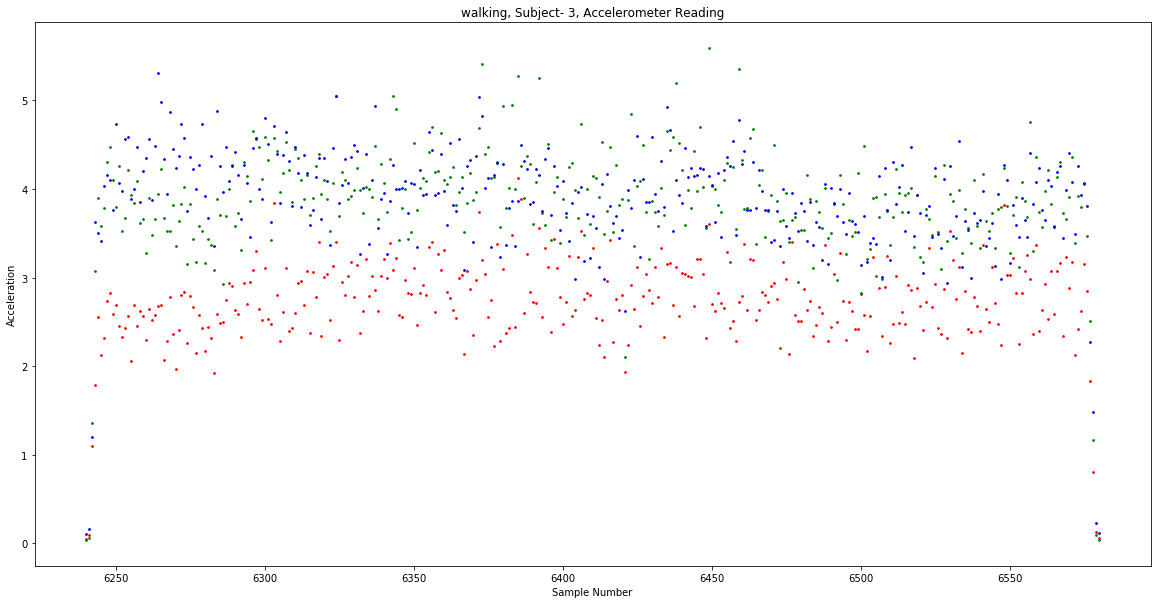

<Figure size 432x288 with 0 Axes>

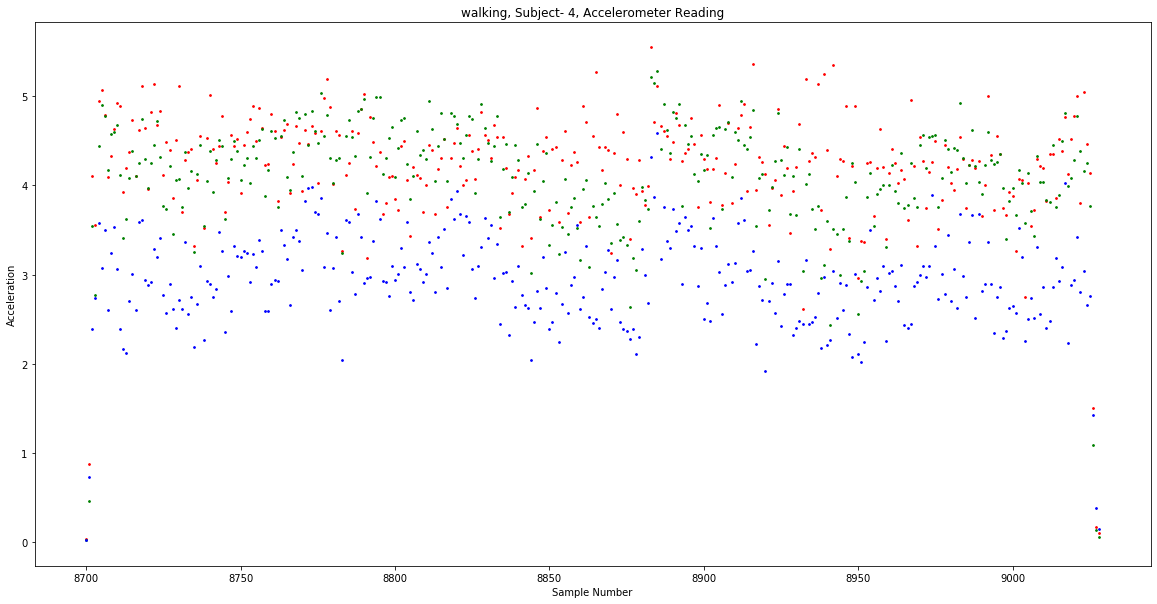

<Figure size 432x288 with 0 Axes>

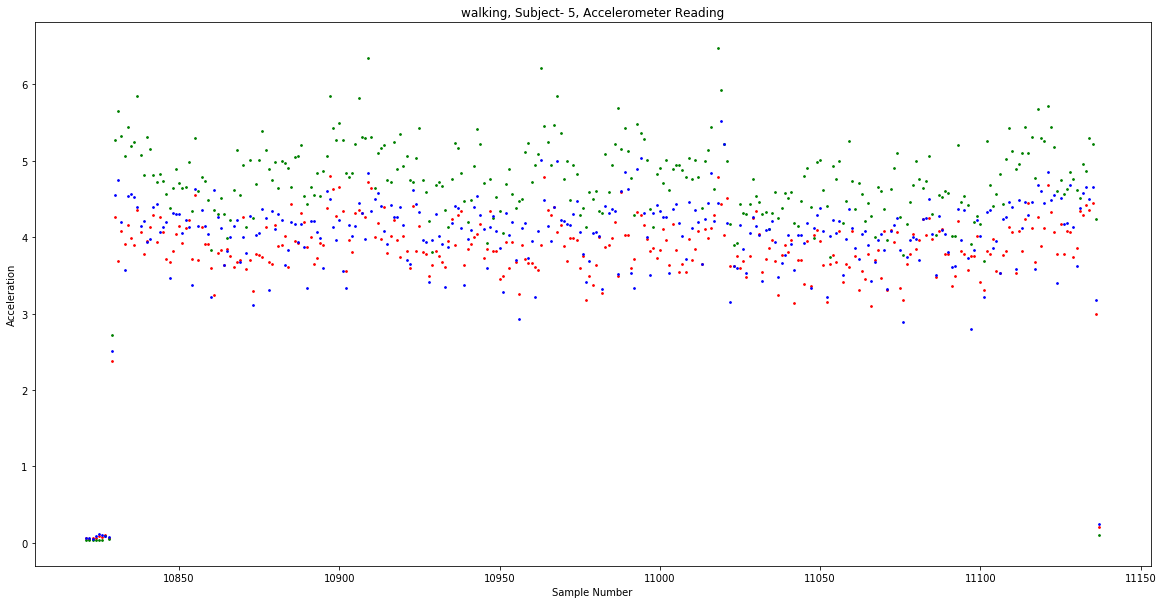

<Figure size 432x288 with 0 Axes>

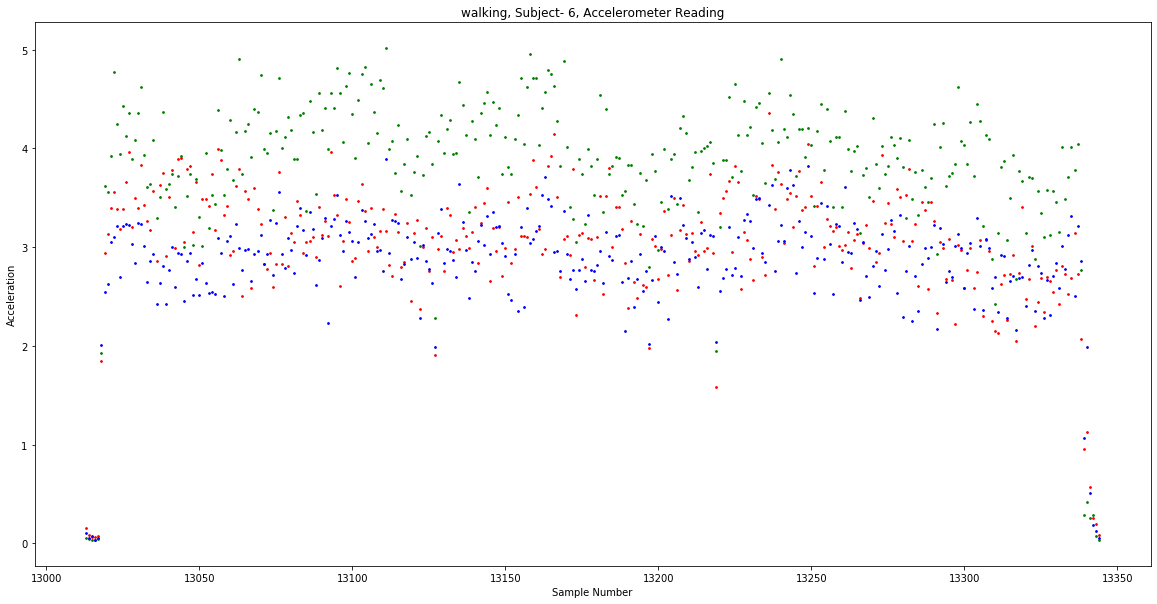

In [4]:
activities=["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]
for act in activities:
    stdplot(deviation,act)

In [5]:
def bad_samples(act,samples_to_drop,operator,threshold):
    df=deviation[(deviation['Activity']==act)]             
    temp=(deviation.Activity==act) & operator(deviation.attr_y_acc,threshold)
    return samples_to_drop.extend(list(df.Sample_Num[temp]))

In [6]:
samples_to_drop=[]
bad_samples('climbingdown',samples_to_drop,operator.lt,1.2)
bad_samples('climbingup',samples_to_drop,operator.lt,1.2)
bad_samples('jumping',samples_to_drop,operator.lt,3.5)
bad_samples('lying',samples_to_drop,operator.gt,0.5)
bad_samples('running',samples_to_drop,operator.lt,5)
bad_samples('sitting',samples_to_drop,operator.gt,1)
bad_samples('walking',samples_to_drop,operator.lt,1.5)
print (100*(len(samples_to_drop)/len(deviation)))

4.016485575121768


In [7]:
clean_data=total_data[~total_data.Sample_Num.isin(samples_to_drop)]
clean_data.drop(clean_data.columns[[0]],axis=1,inplace=True)
clean_data.reset_index(inplace=True,drop=True)
clean_data.to_csv('E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH\Data/clean_data.csv')

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

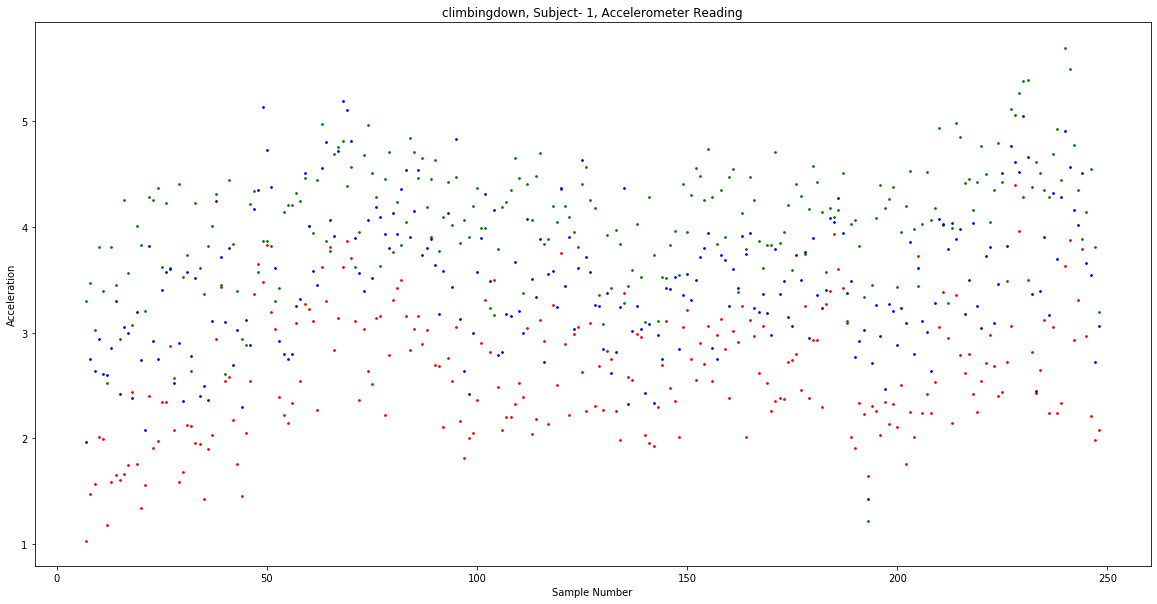

<Figure size 432x288 with 0 Axes>

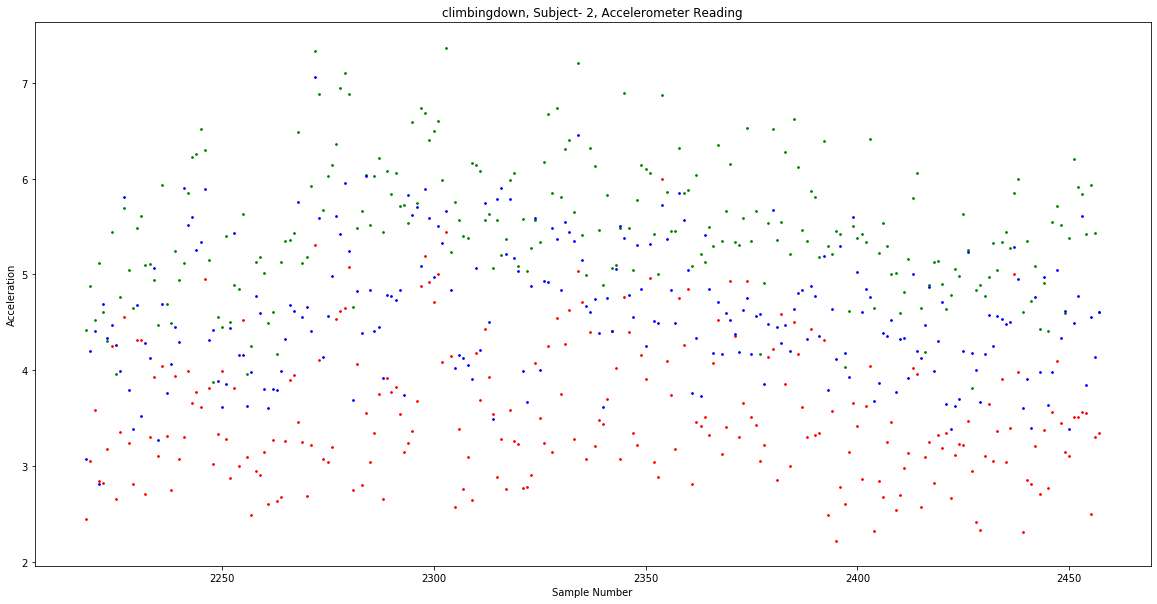

<Figure size 432x288 with 0 Axes>

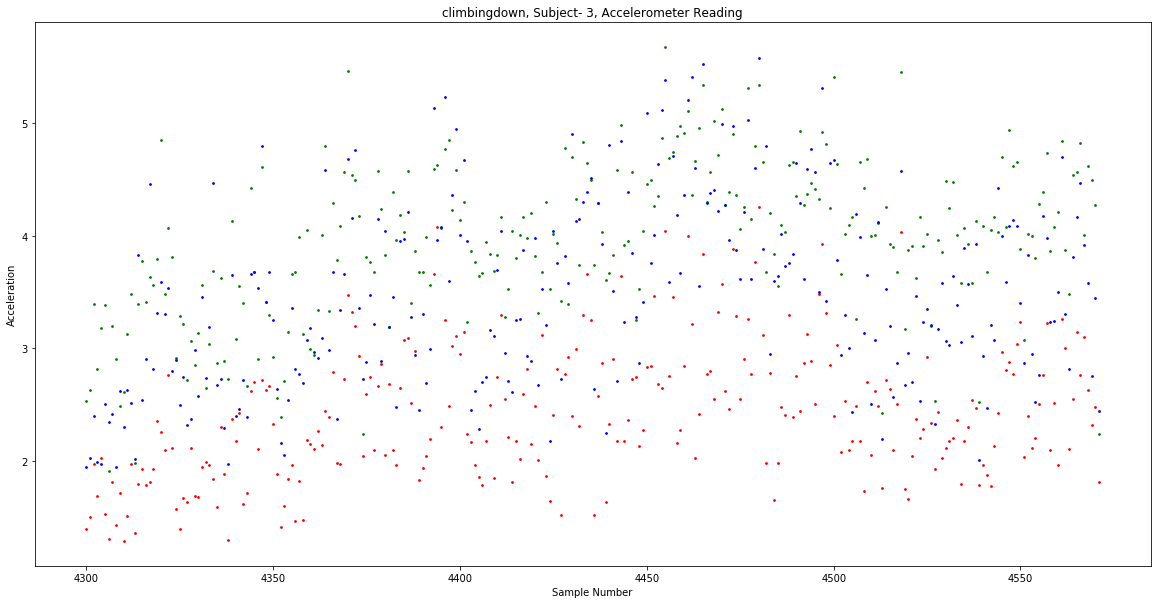

<Figure size 432x288 with 0 Axes>

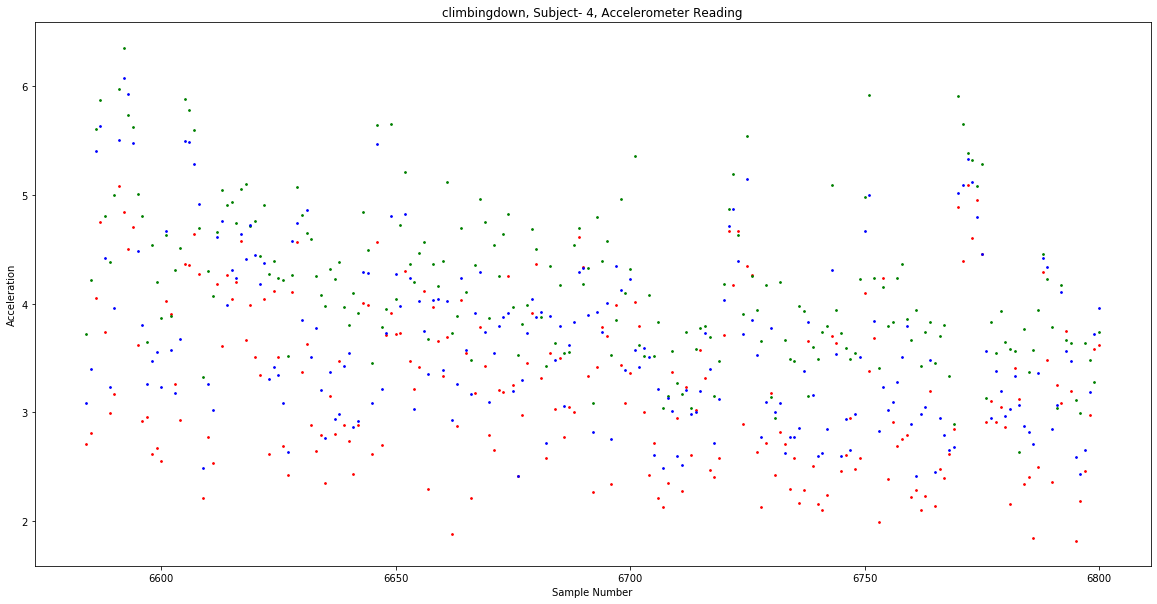

<Figure size 432x288 with 0 Axes>

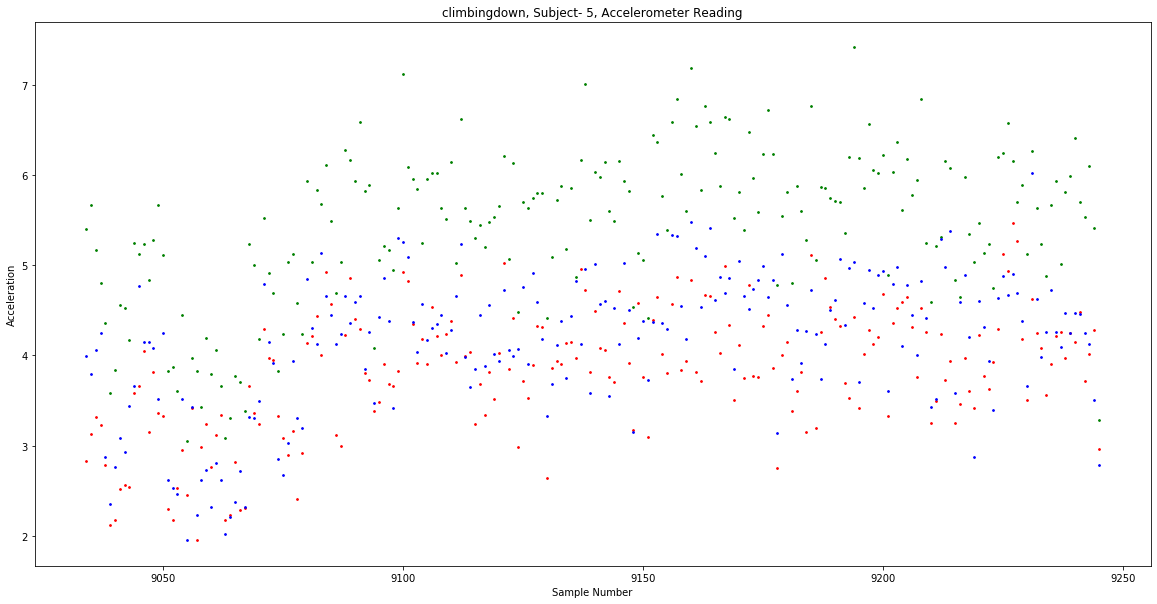

<Figure size 432x288 with 0 Axes>

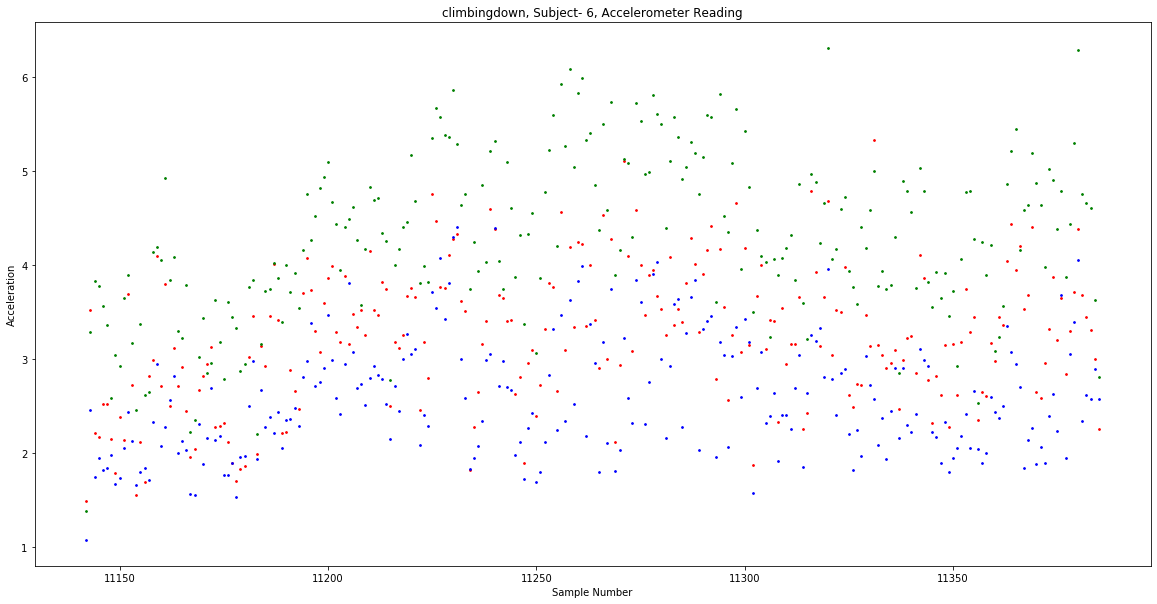

<Figure size 432x288 with 0 Axes>

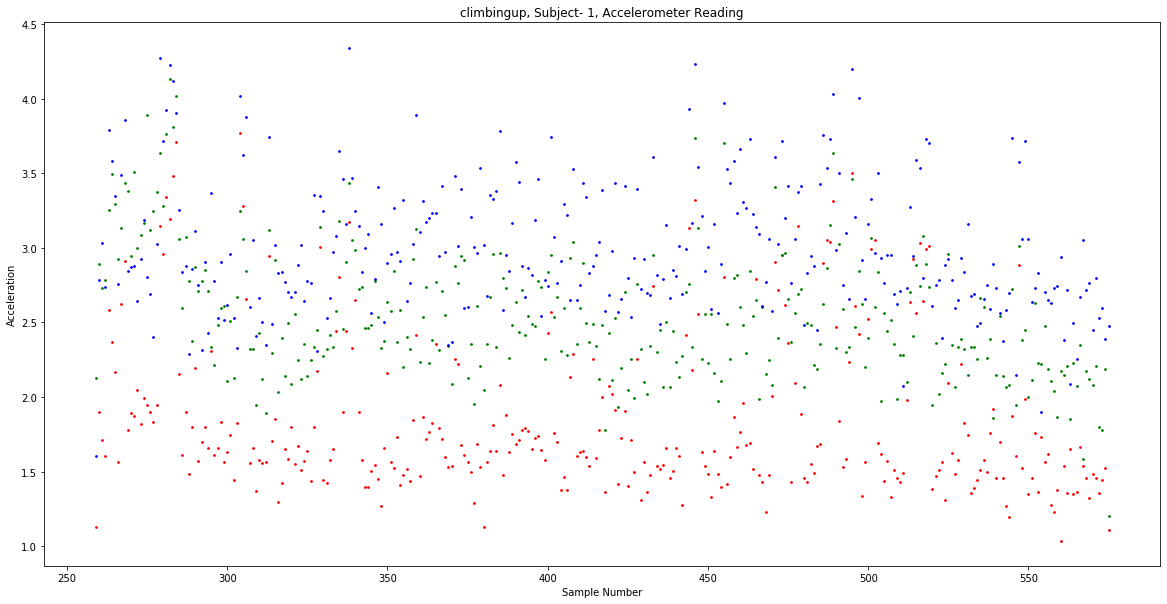

<Figure size 432x288 with 0 Axes>

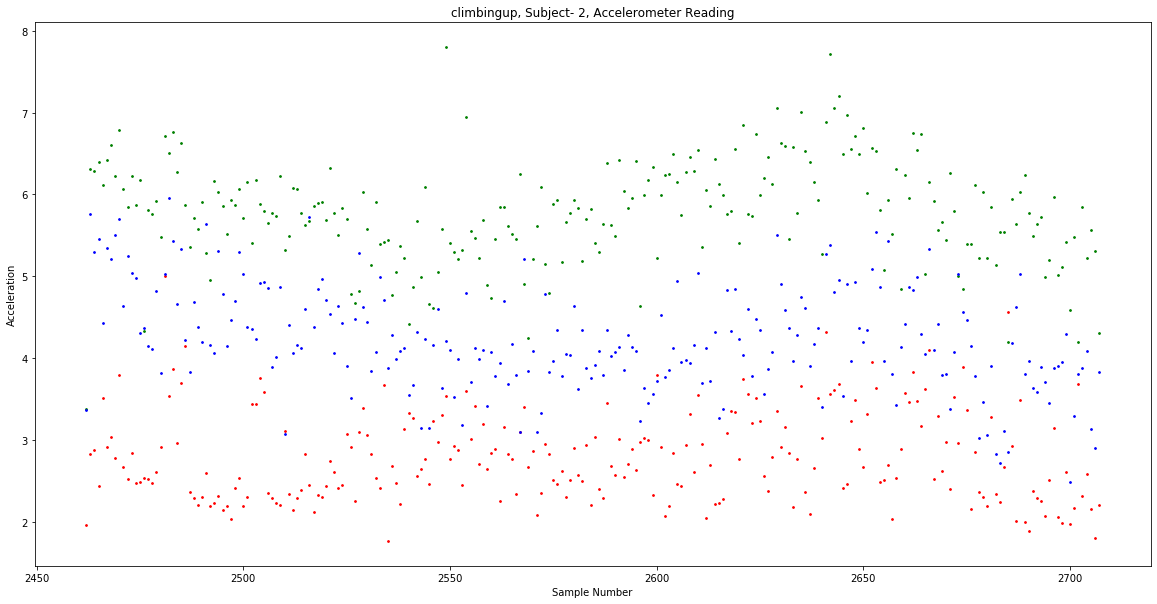

<Figure size 432x288 with 0 Axes>

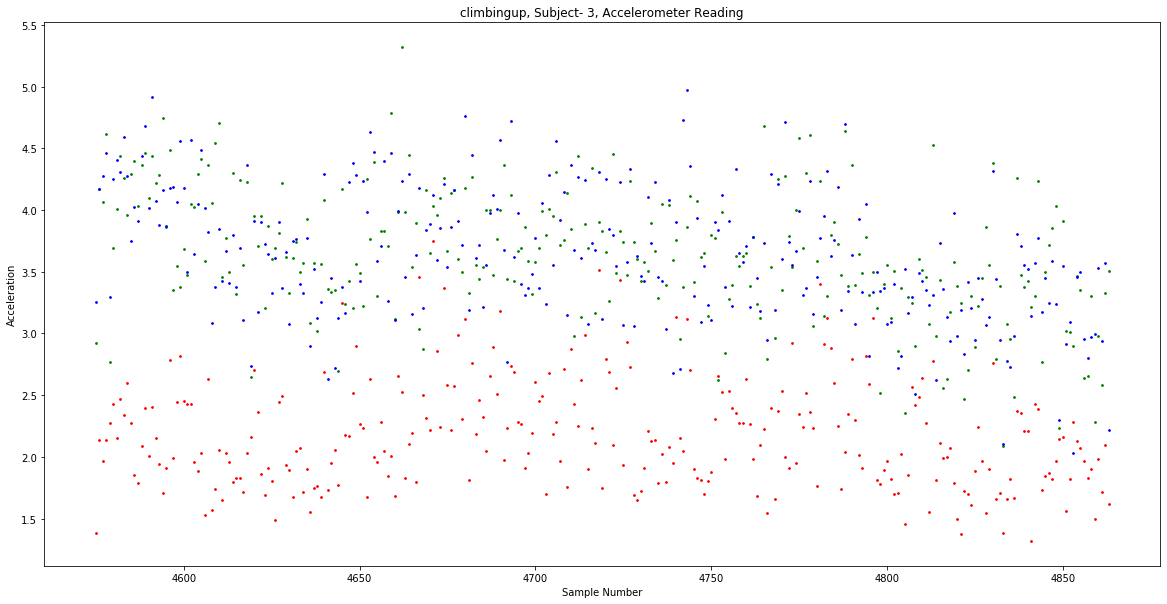

<Figure size 432x288 with 0 Axes>

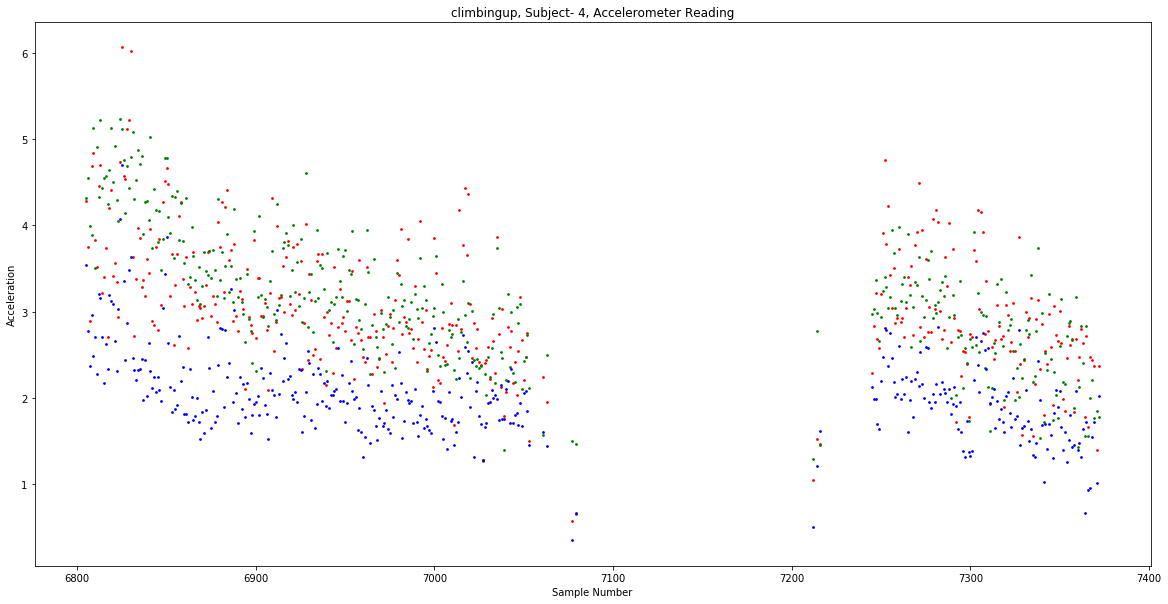

<Figure size 432x288 with 0 Axes>

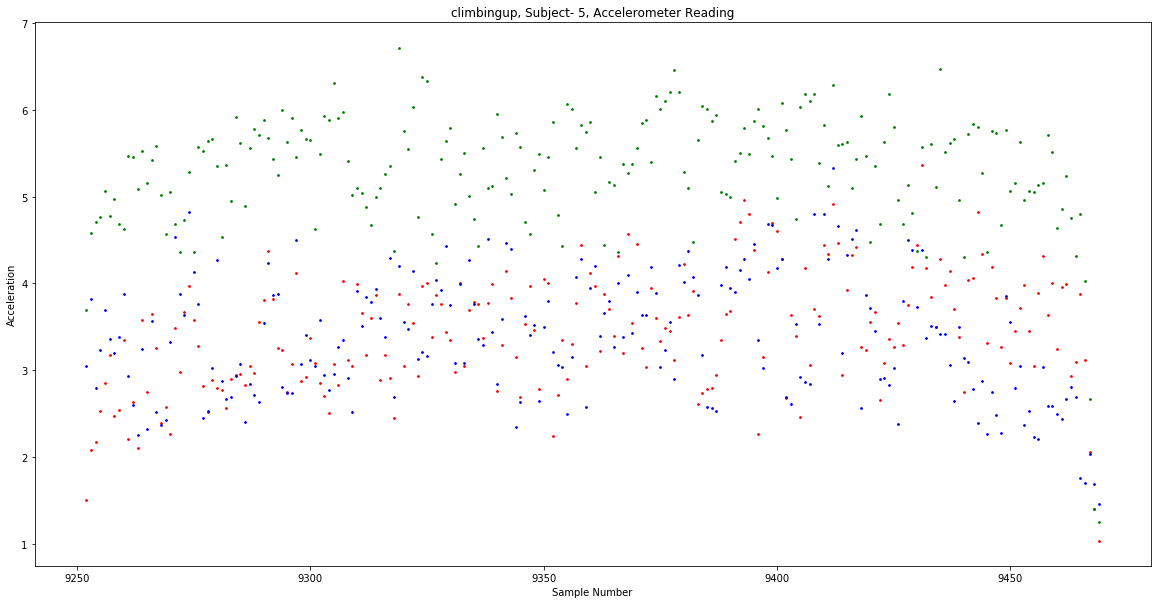

<Figure size 432x288 with 0 Axes>

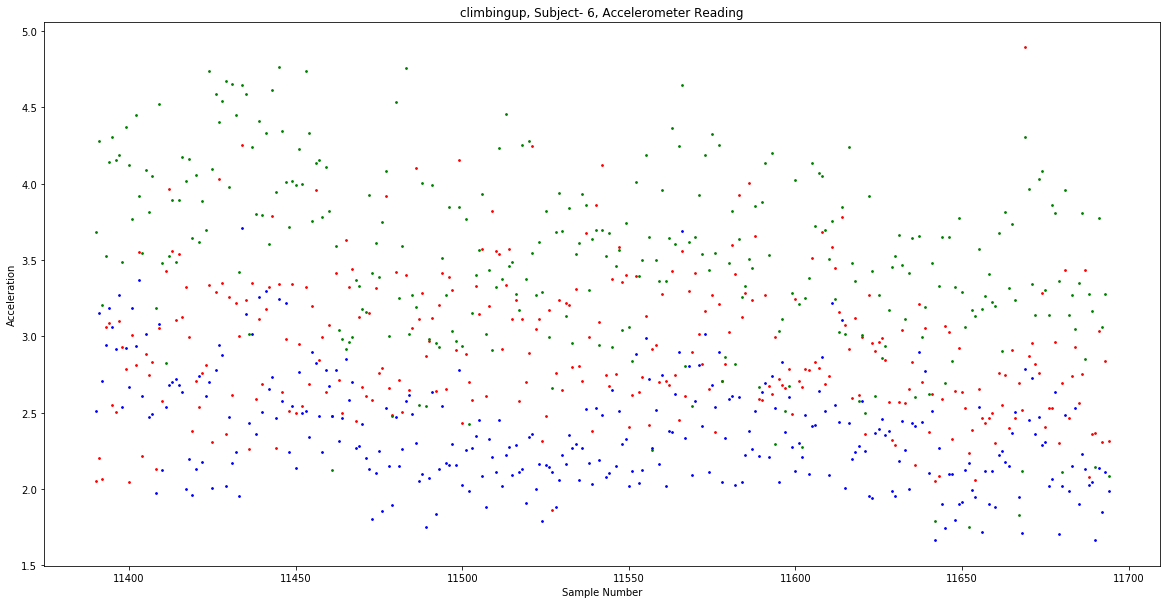

<Figure size 432x288 with 0 Axes>

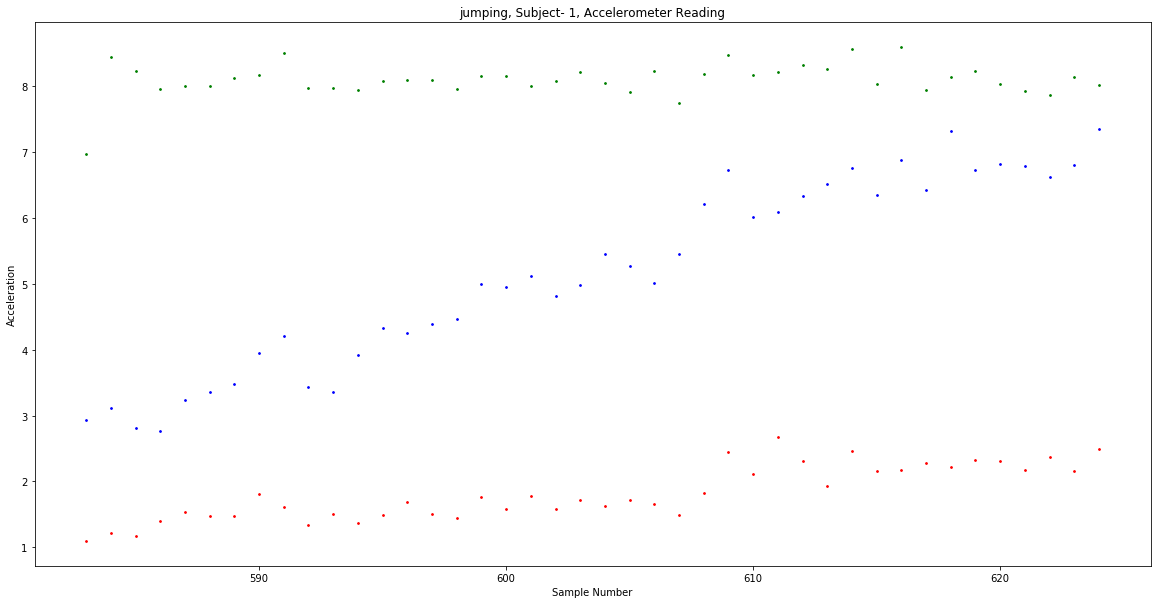

<Figure size 432x288 with 0 Axes>

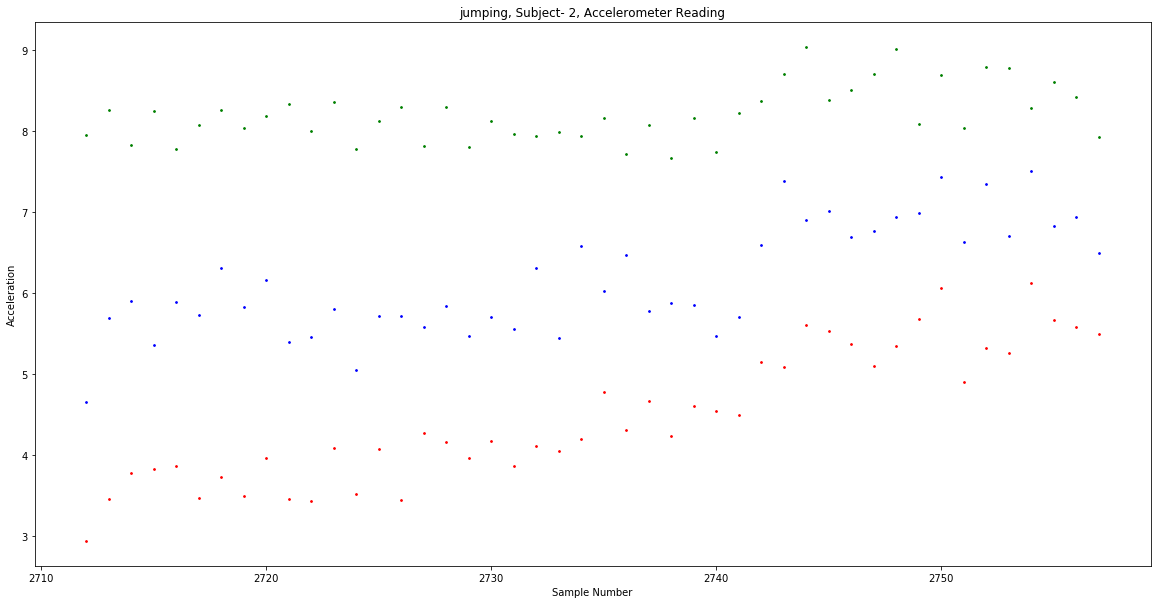

<Figure size 432x288 with 0 Axes>

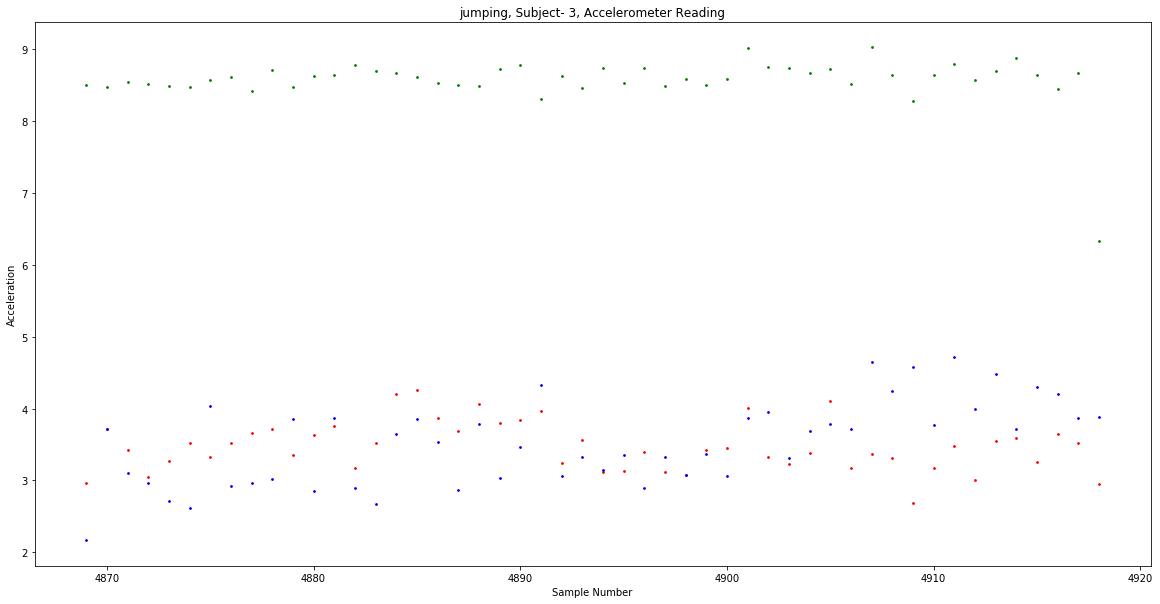

<Figure size 432x288 with 0 Axes>

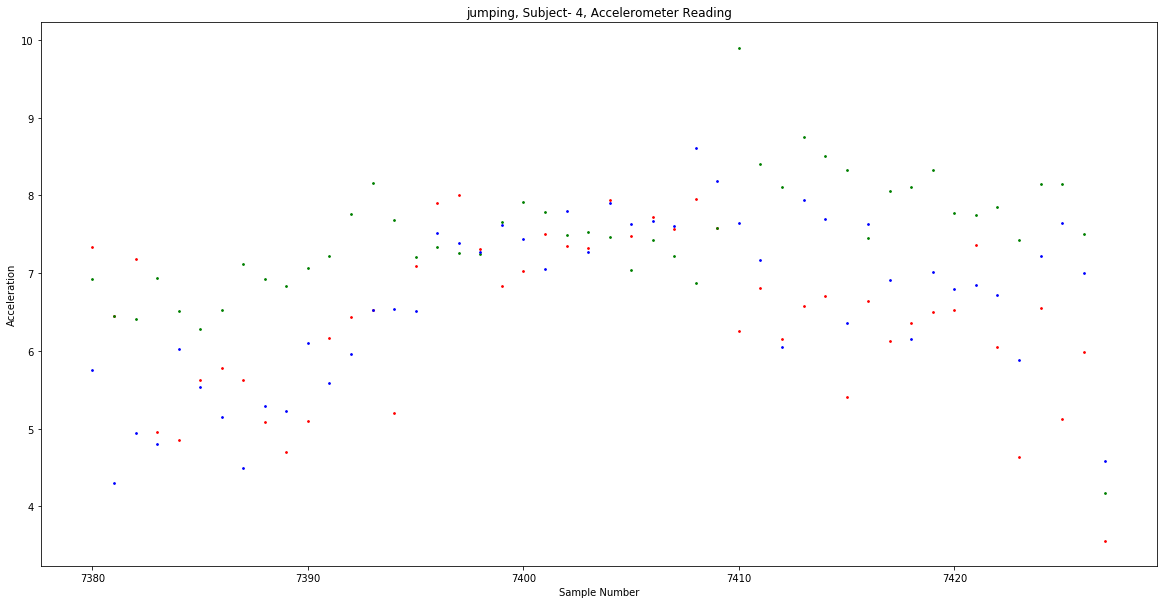

<Figure size 432x288 with 0 Axes>

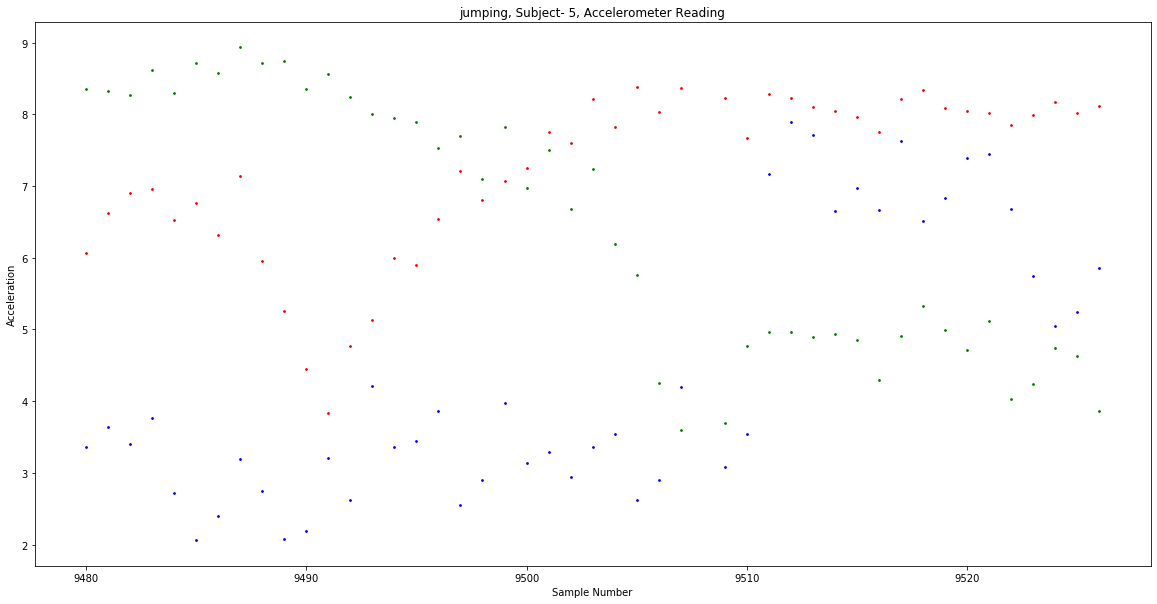

<Figure size 432x288 with 0 Axes>

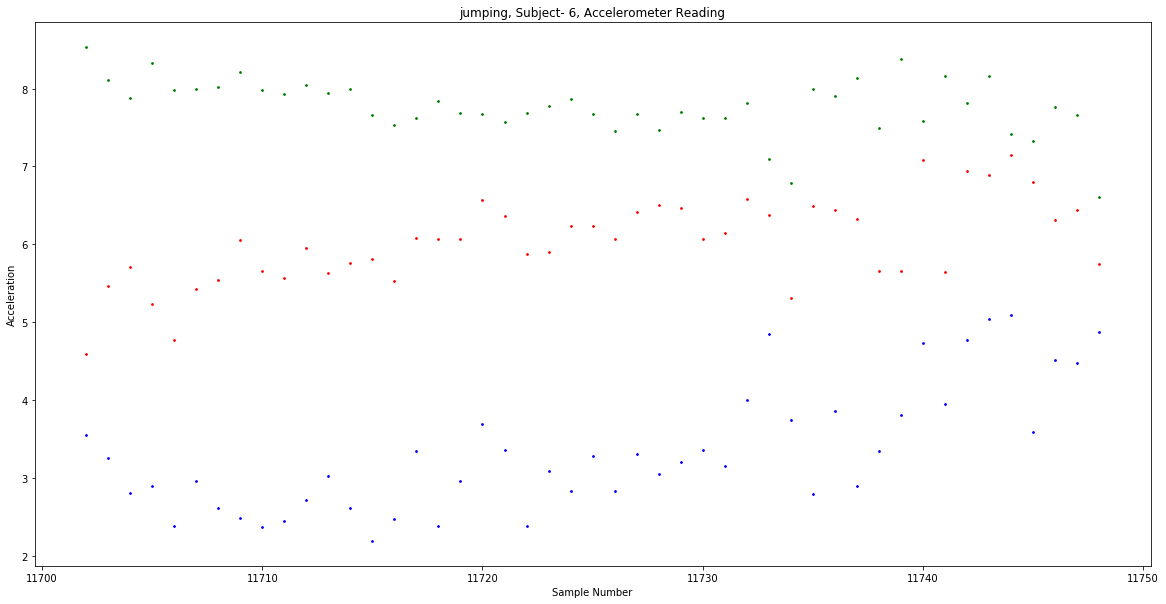

<Figure size 432x288 with 0 Axes>

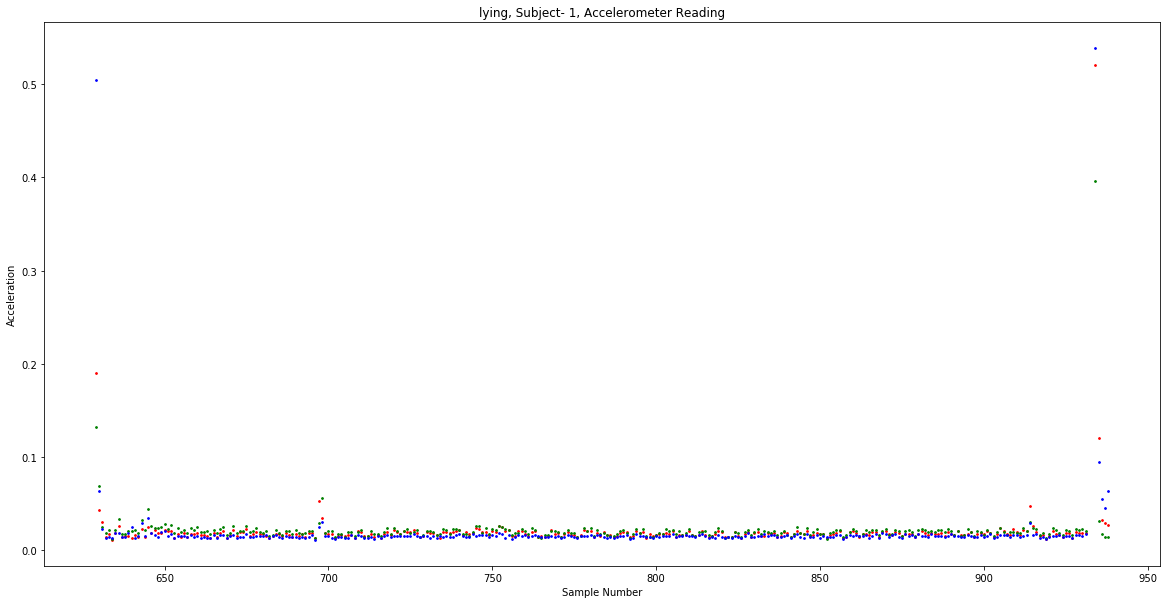

<Figure size 432x288 with 0 Axes>

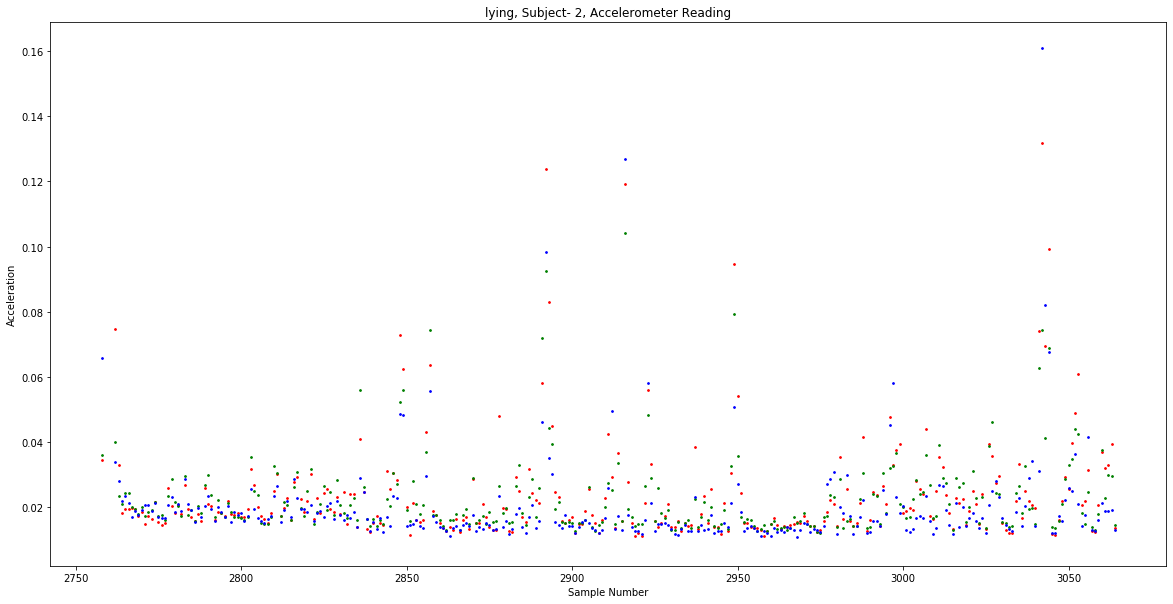

<Figure size 432x288 with 0 Axes>

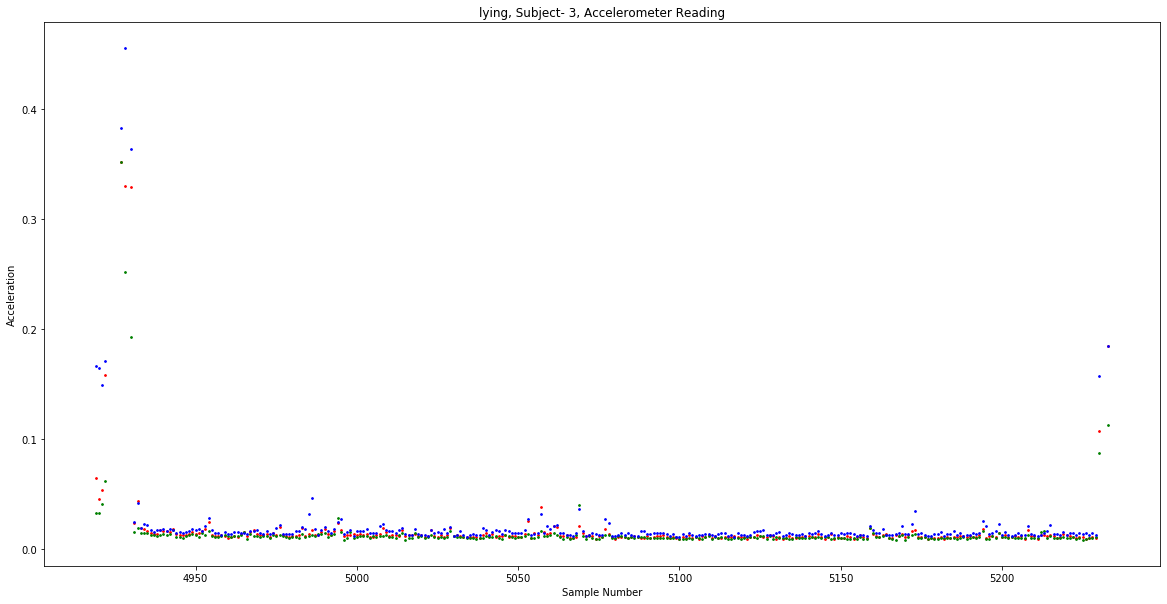

<Figure size 432x288 with 0 Axes>

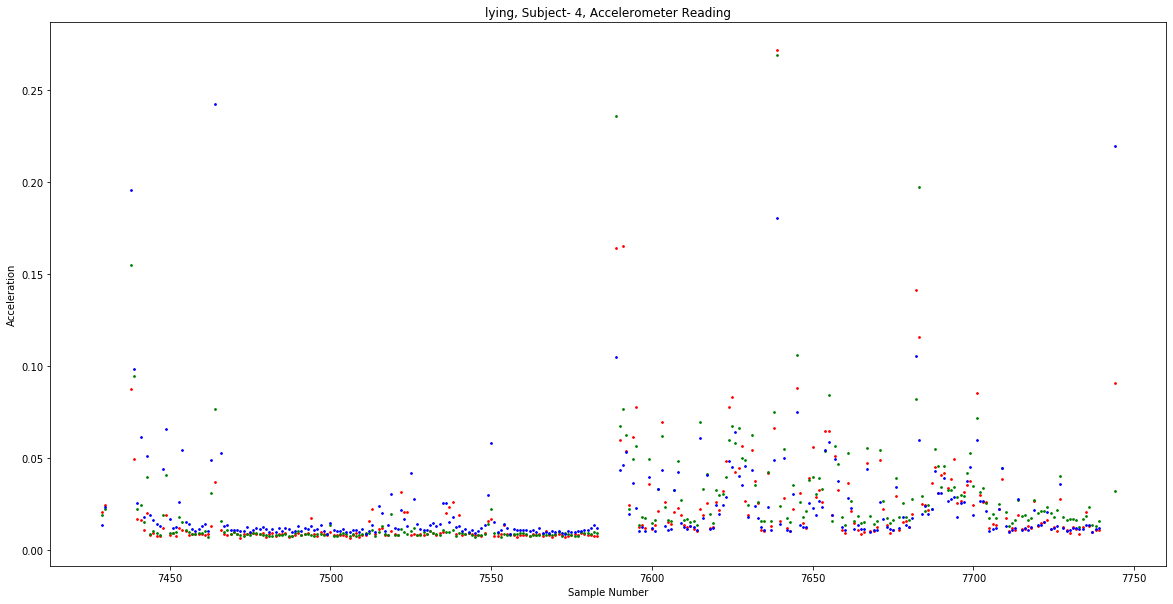

<Figure size 432x288 with 0 Axes>

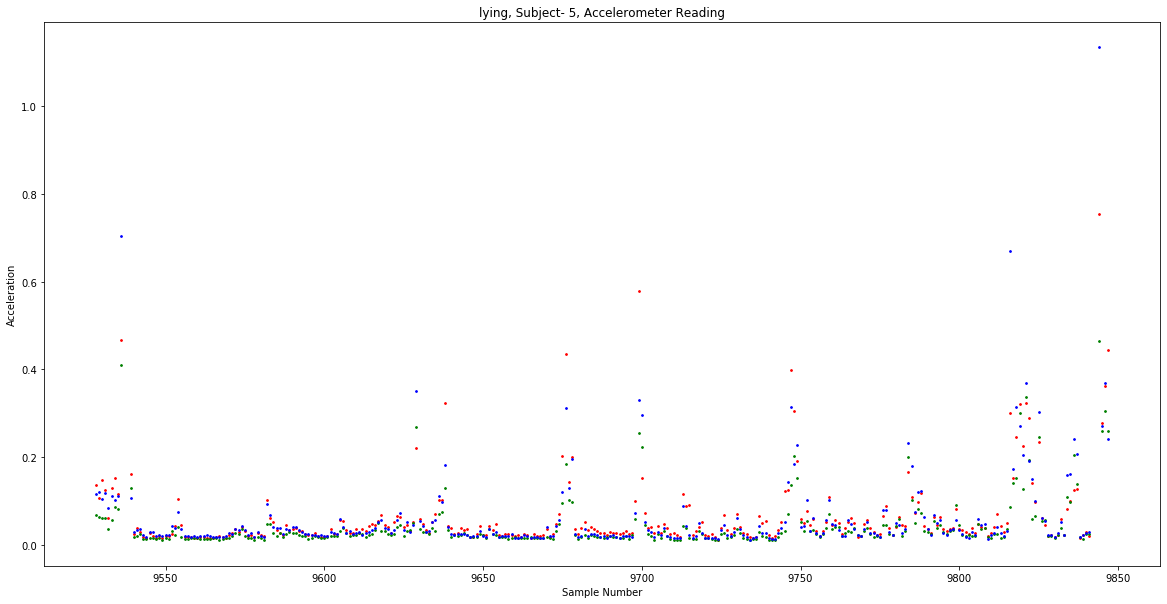

<Figure size 432x288 with 0 Axes>

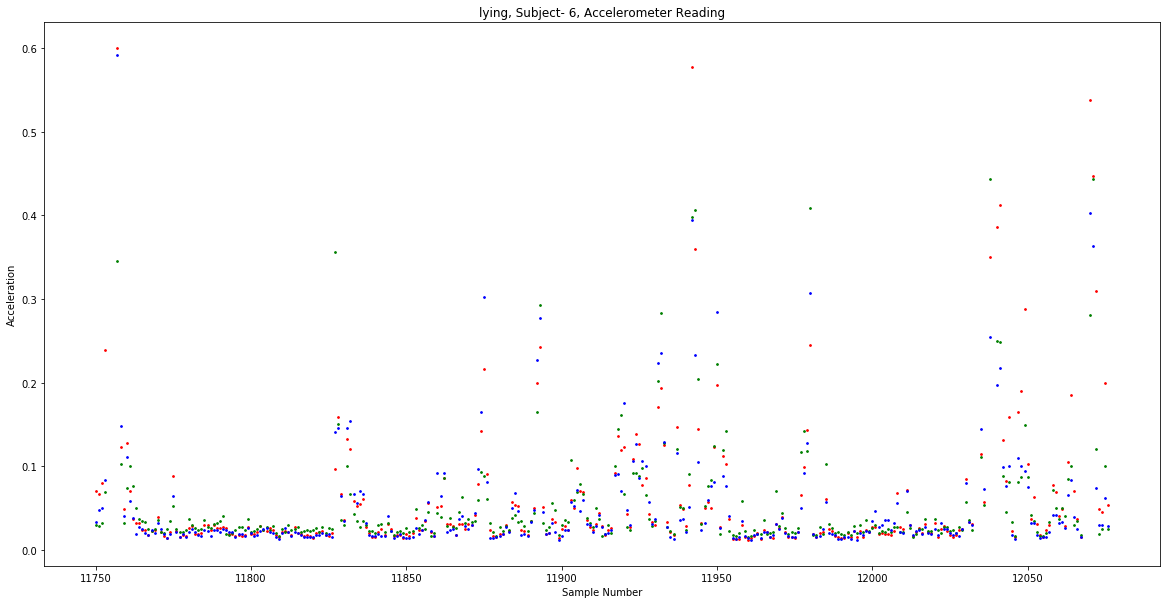

<Figure size 432x288 with 0 Axes>

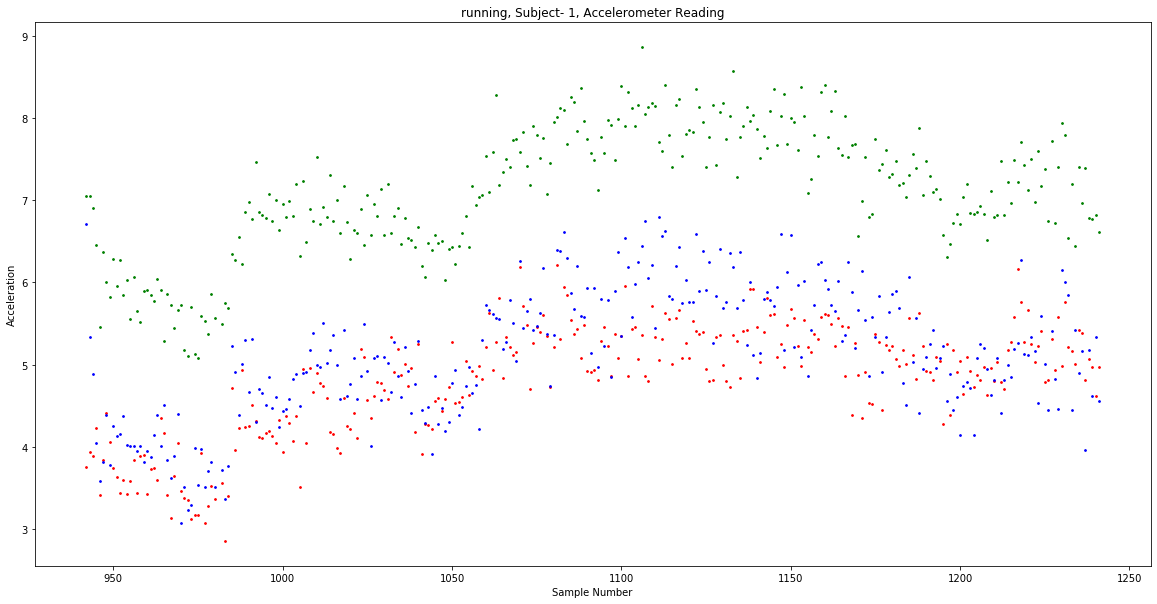

<Figure size 432x288 with 0 Axes>

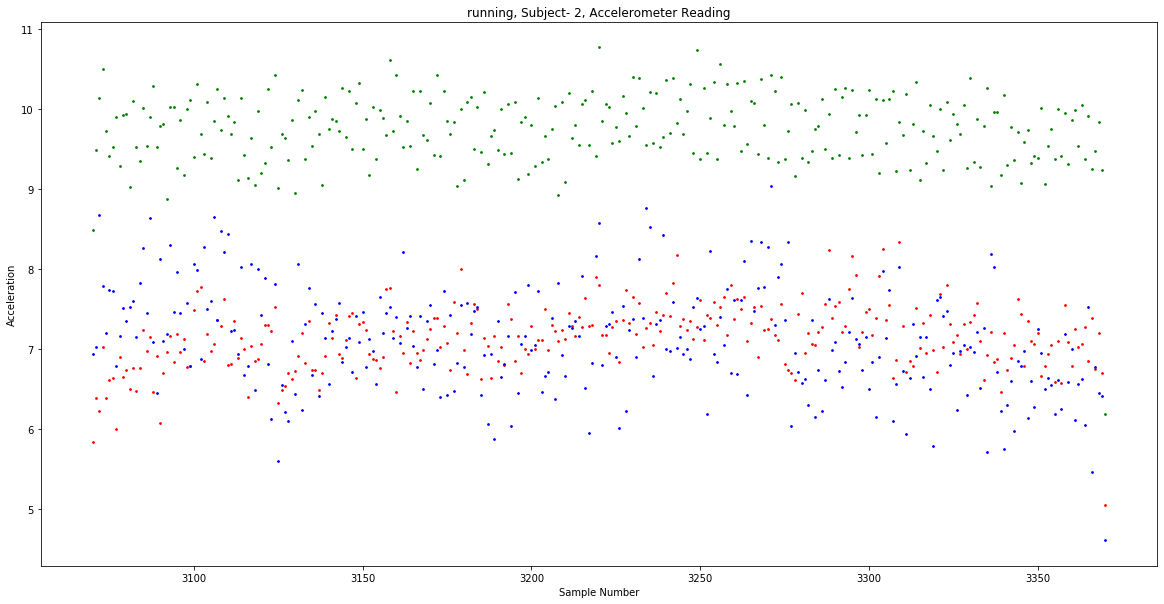

<Figure size 432x288 with 0 Axes>

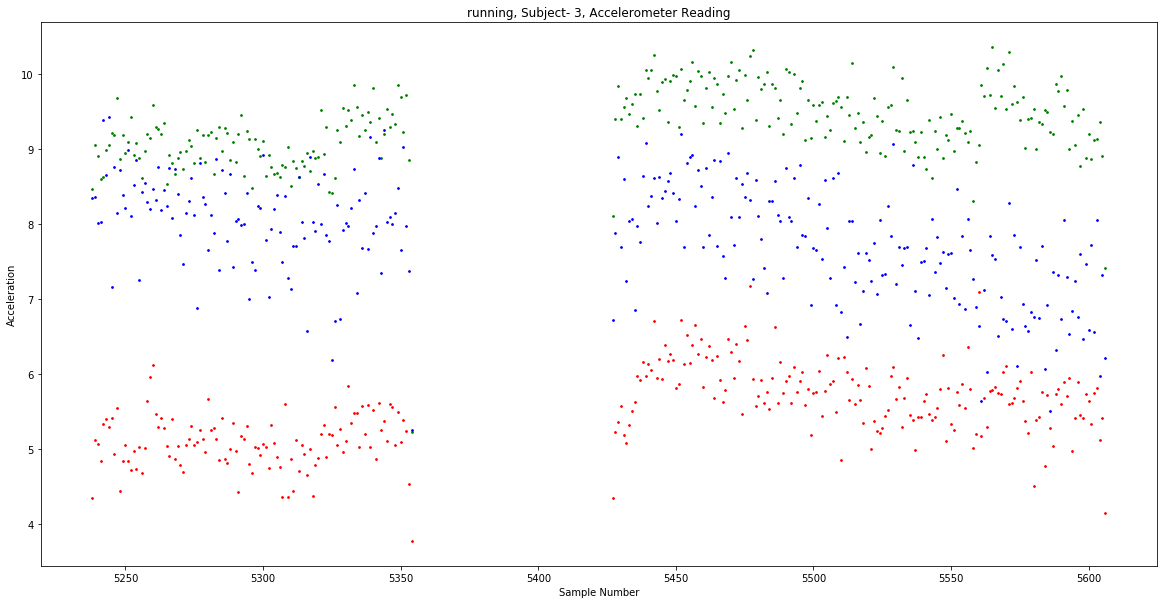

<Figure size 432x288 with 0 Axes>

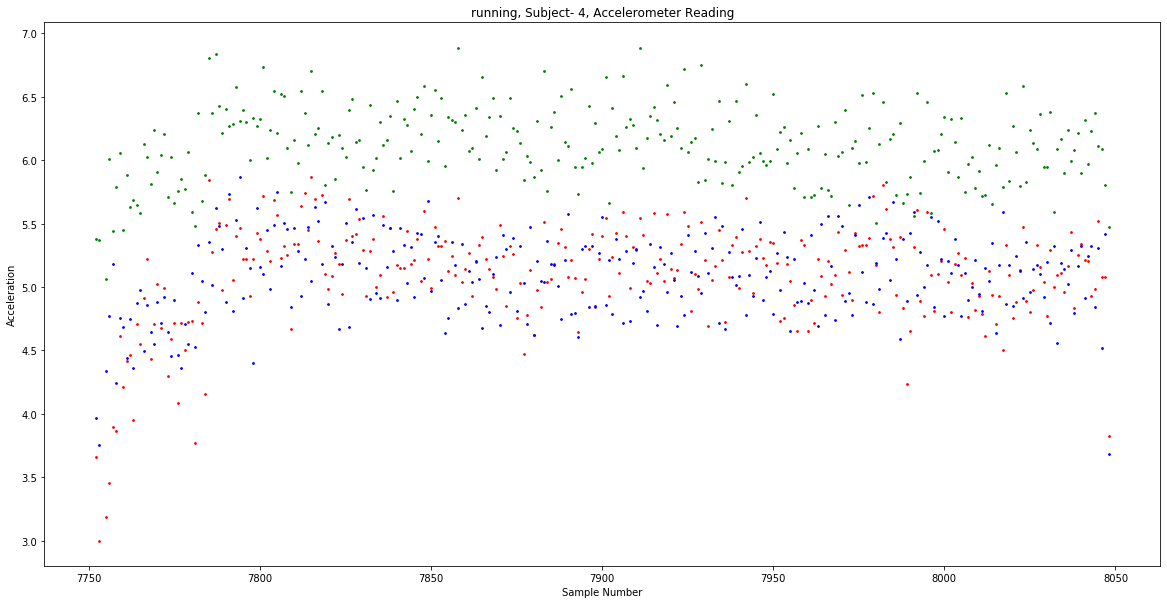

<Figure size 432x288 with 0 Axes>

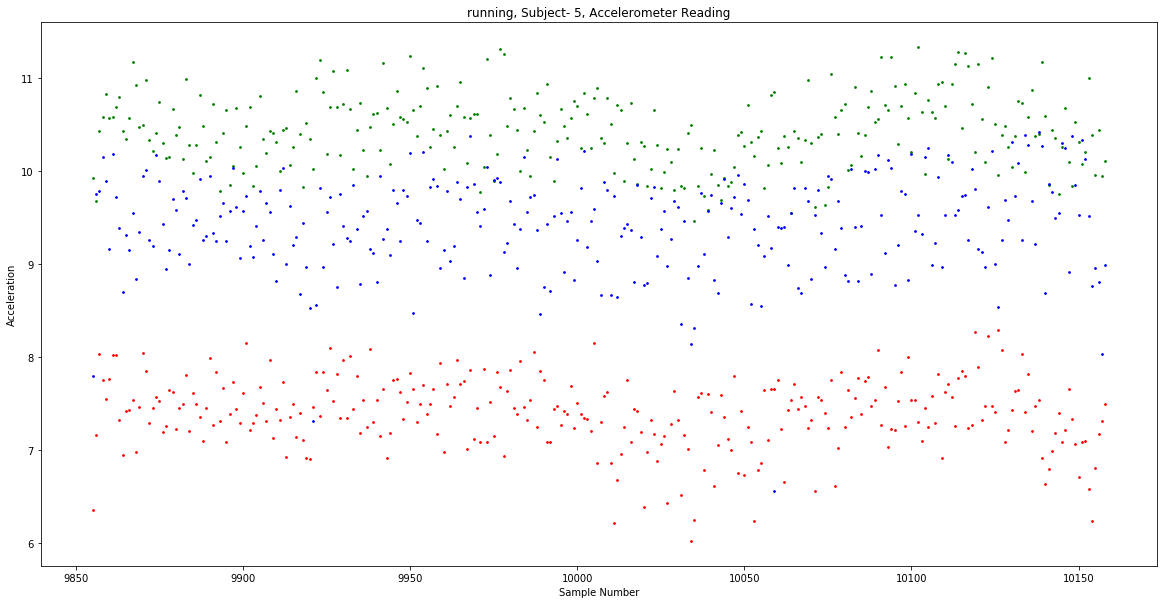

<Figure size 432x288 with 0 Axes>

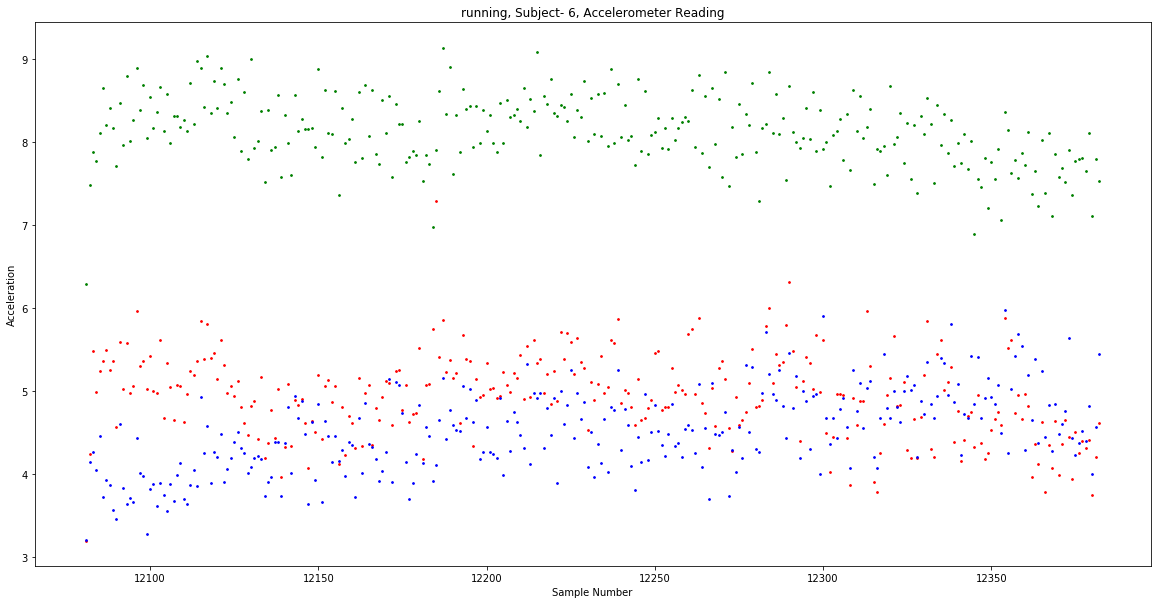

<Figure size 432x288 with 0 Axes>

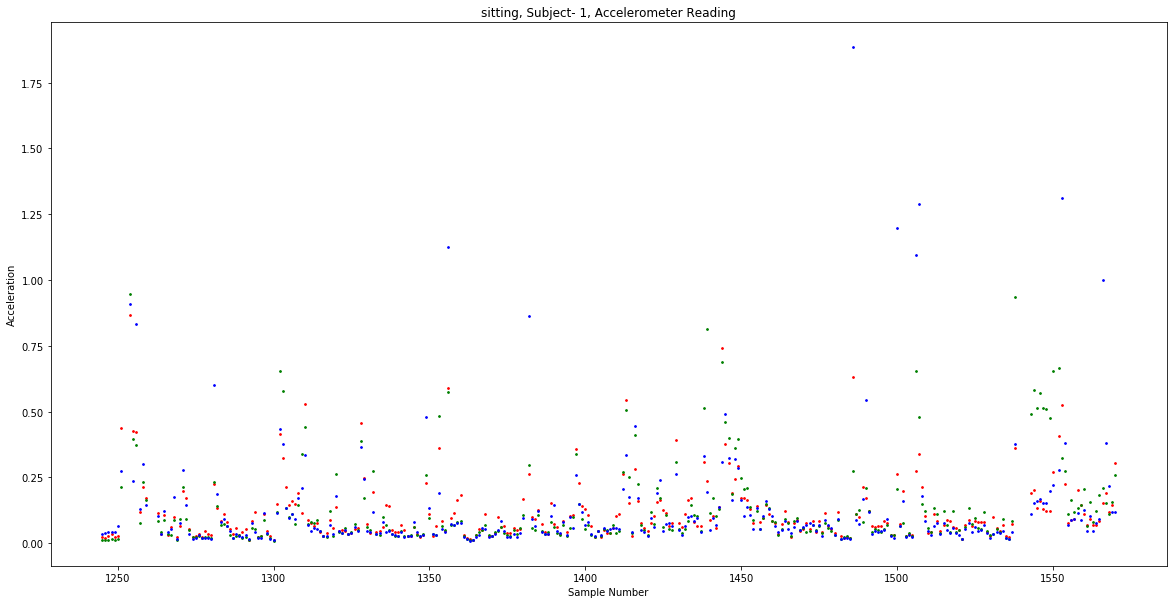

<Figure size 432x288 with 0 Axes>

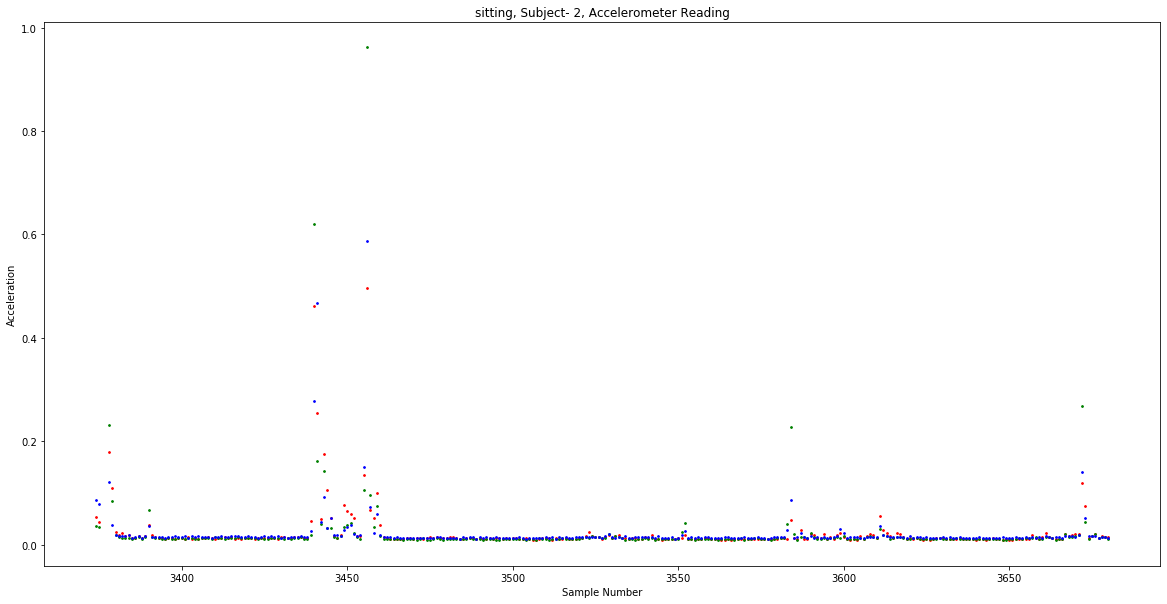

<Figure size 432x288 with 0 Axes>

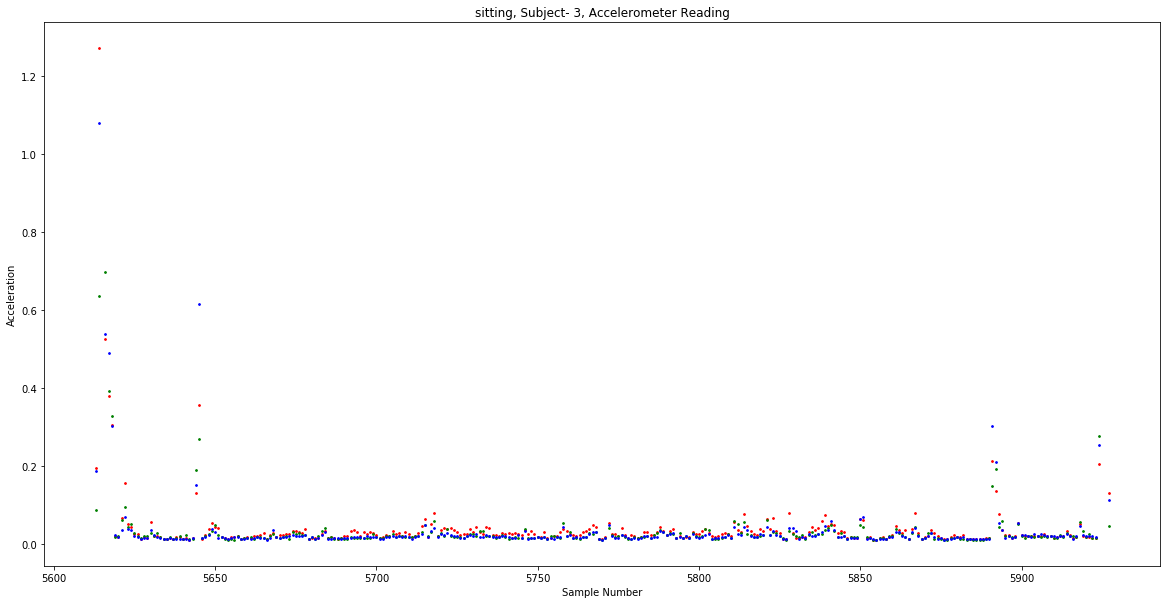

<Figure size 432x288 with 0 Axes>

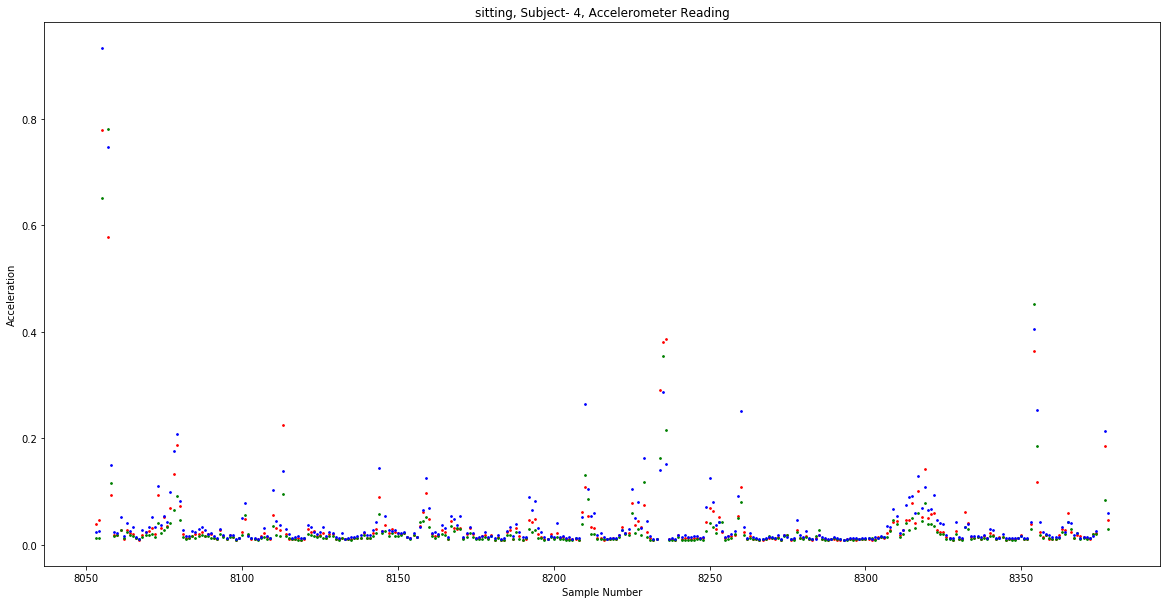

<Figure size 432x288 with 0 Axes>

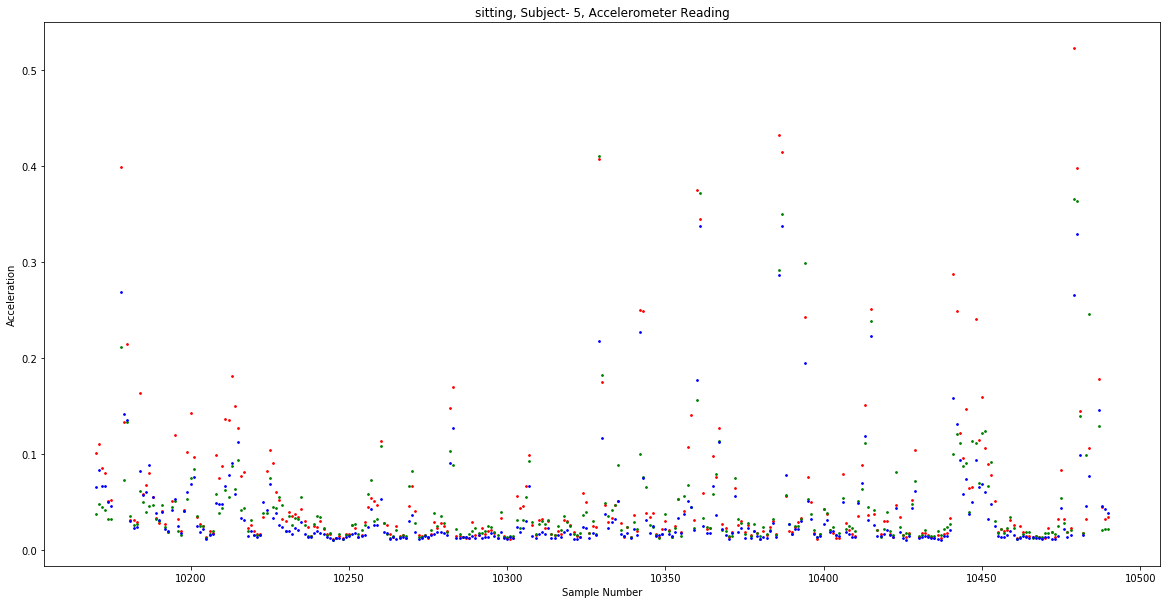

<Figure size 432x288 with 0 Axes>

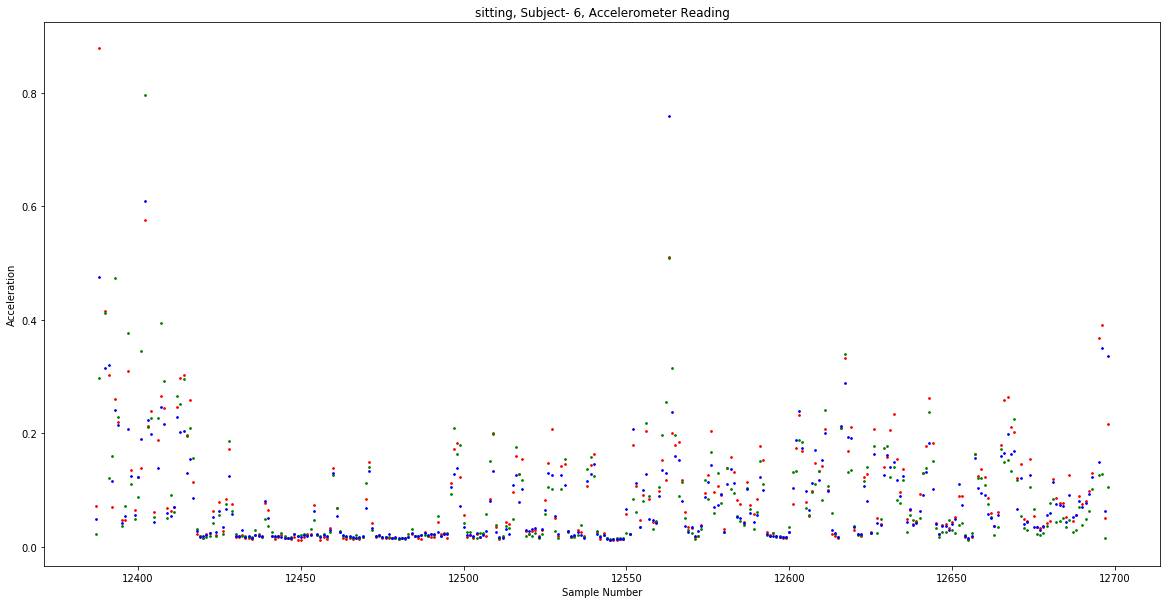

<Figure size 432x288 with 0 Axes>

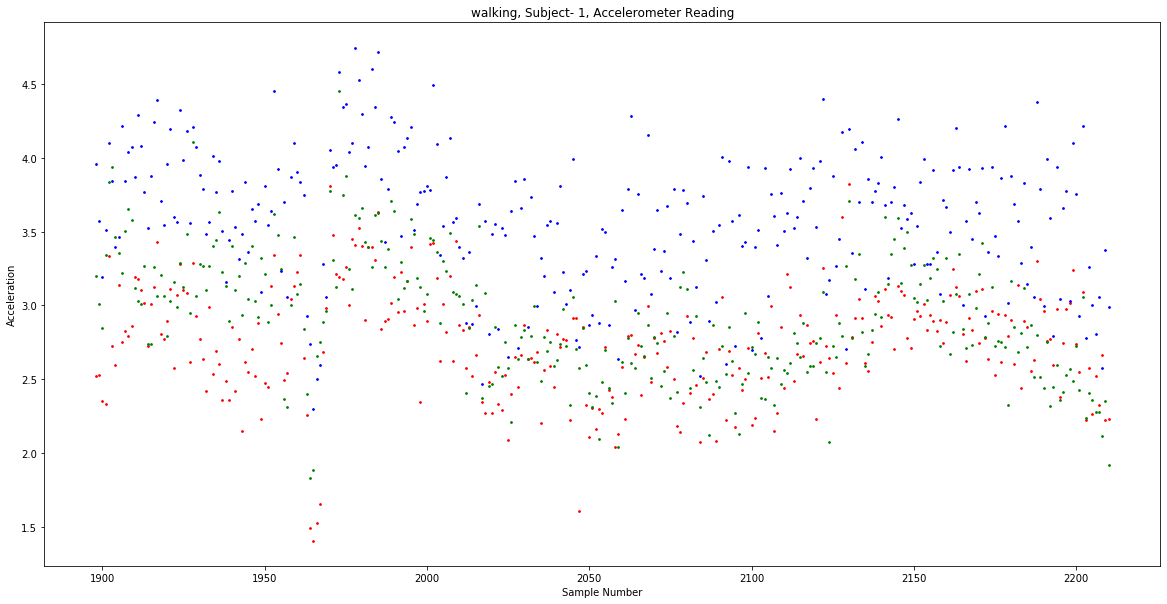

<Figure size 432x288 with 0 Axes>

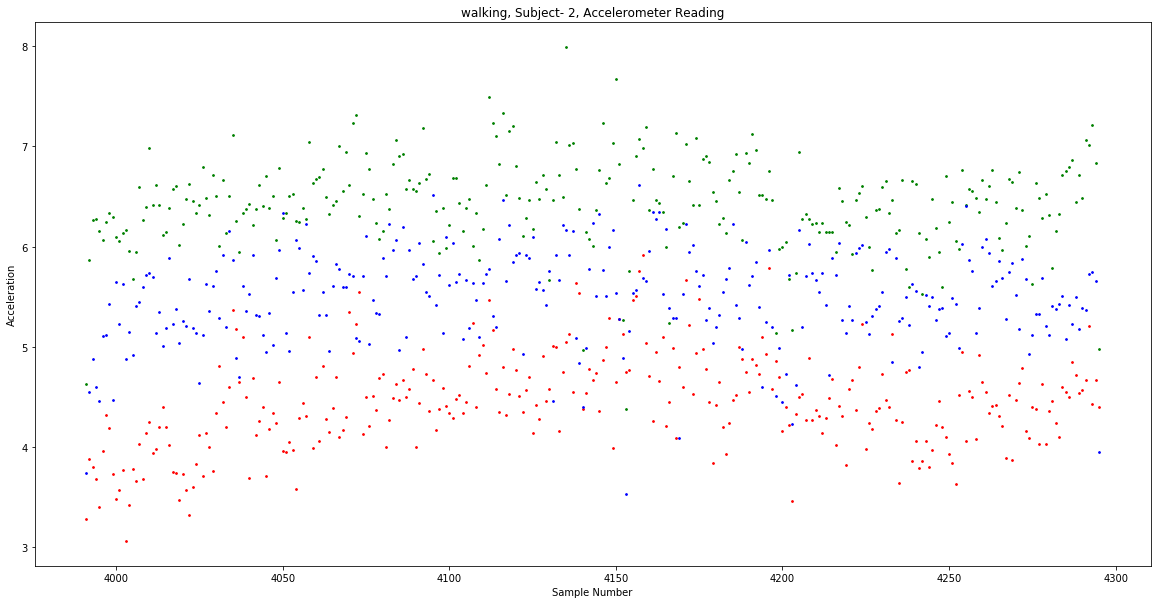

<Figure size 432x288 with 0 Axes>

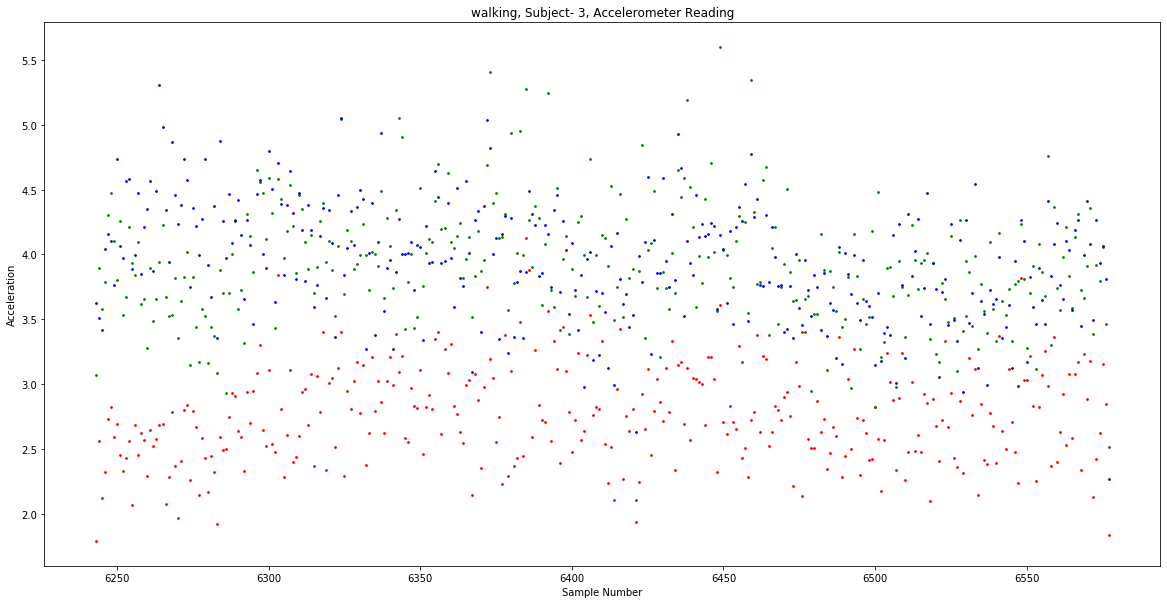

<Figure size 432x288 with 0 Axes>

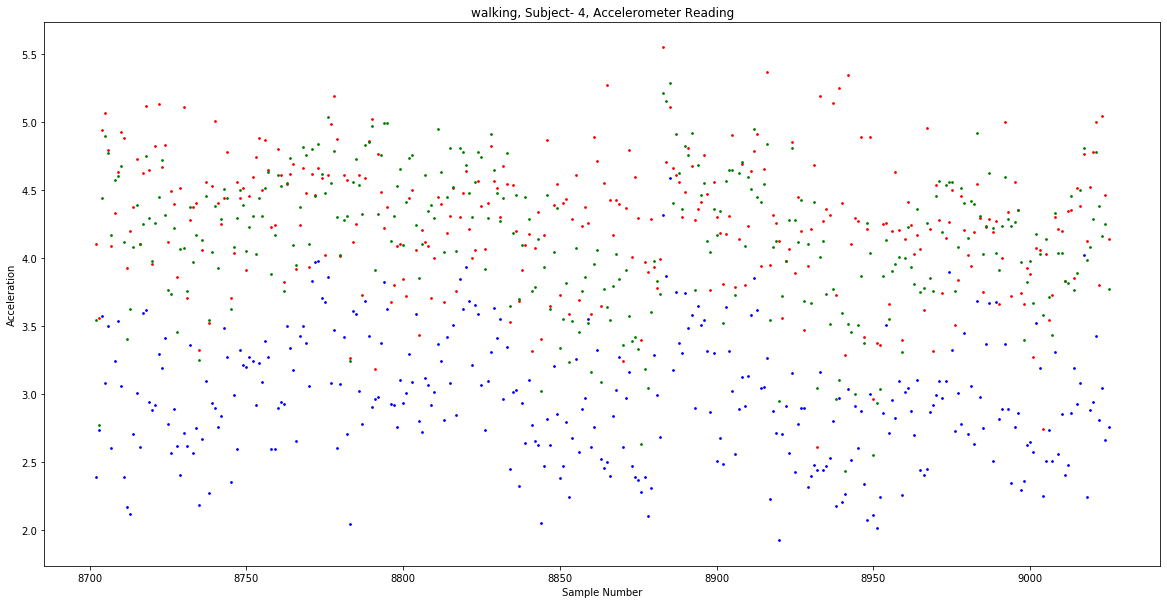

<Figure size 432x288 with 0 Axes>

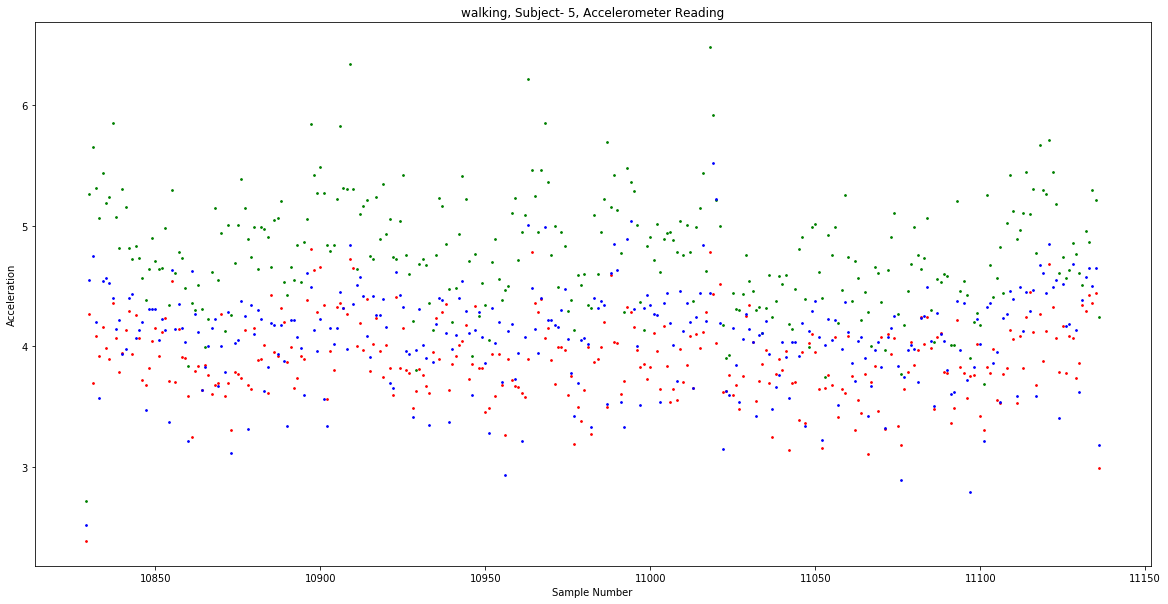

<Figure size 432x288 with 0 Axes>

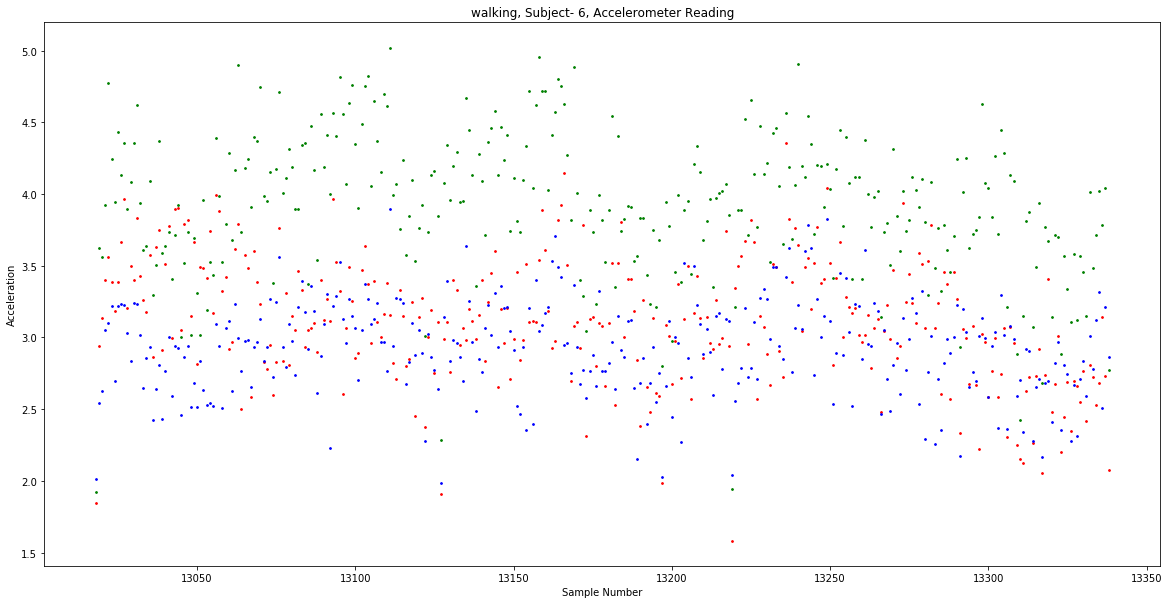

In [8]:
activities =["climbingdown","climbingup","jumping","lying","running","sitting","walking"]
for act in activities:
    data = deviation[~deviation.Sample_Num.isin(samples_to_drop)]
    stdplot(data,act)